## Comparison of groundtruth (Machine-measured and hand-measured data -- Dr. Nicholas), Features extracted by SAM (image processing by SegmentAnything)

*Harpreet Kaur Bargota

*harpreet.bargota@agr.gc.ca

#### For ground_truth (Machine measured and hand measured data): the excel file is "Faba Seed Analyzer Data June 2024 - Dr.Nick.xlsx", sheet_name="Individual S2 Seed Data". Machine measured data and hand measured was available for some of the images that were provided by Dr. Nicholas

#### For Feature extraction (SAM): the file is "Fava_bean_Features_extraction.csv" (in the output-11-cropped folder). The images were chosen based on the availability of machine measured and hand measured data.

#### At the begining, 11 images have been selected as these images had the data for machine measured, and feature extraction through image analysis. Hand measured data was available only for 10 images.

#### For comparison studies, 10 images ('Vf1-1-2','Vf11-1-1', 'Vf13-1-1', 'Vf14-1-2', 'Vf15-1-1', 'Vf17-1-1', 'Vf4-1-1', 'Vf7-1-1', 'Vf8-1-1', 'Vf9-1-1') that had all the data for ground truth and Feature extraction, are used in the present work.

In [1]:
#import the libraries required for analysis
import pandas as pd
import seaborn as sns
import cv2
import os
import matplotlib.pyplot as plt
from scipy.stats import (pearsonr, ttest_rel, f_oneway, spearmanr, shapiro, levene, wilcoxon, kruskal, skew, kurtosis )
import warnings
warnings.filterwarnings(action='ignore')

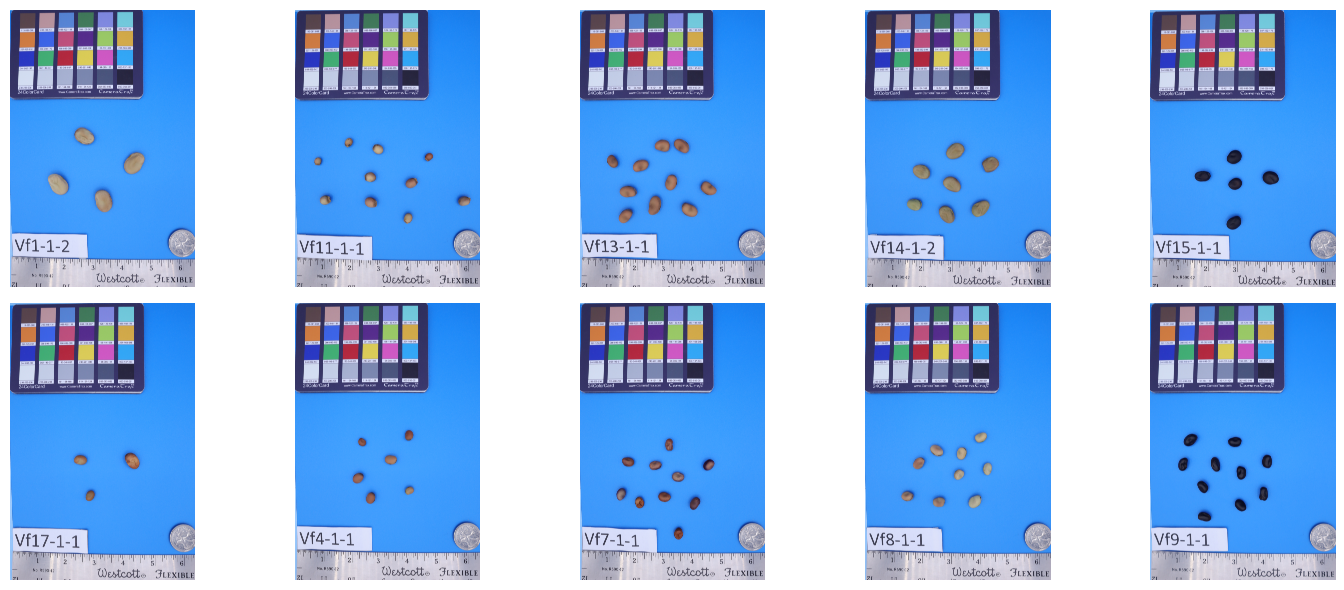

In [2]:
# List of image filenames
image_list= ['Faba-Seed-CC_Vf1-1-2.JPG','Faba-Seed-CC_Vf11-1-1.JPG', 'Faba-Seed-CC_Vf13-1-1.JPG', 'Faba-Seed-CC_Vf14-1-1.JPG', 'Faba-Seed-CC_Vf15-1-1.JPG', 'Faba-Seed-CC_Vf17-1-1.JPG', 'Faba-Seed-CC_Vf4-1-1.JPG', 'Faba-Seed-CC_Vf7-1-1.JPG', 'Faba-Seed-CC_Vf8-1-1.JPG', 'Faba-Seed-CC_Vf9-1-1.JPG']

# Path to the folder containing images
folder_path= 'C:/Users/bargotah/Downloads/Python Scripts/images'


# Create a figure and a set of subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Loop through the images and plot them
for i, ax in enumerate(axes.flat):
    img_path = os.path.join(folder_path, image_list[i])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    ax.axis('off')  # Hide the axes

# Adjust layout
plt.tight_layout()
plt.show()

### Groundtruth-Machine measured and hand measured data

In [3]:
#Read the hand and machine measured data
ground_truth = pd.read_excel("Faba Seed Analyzer Data June 2024 - Dr.Nick.xlsx", sheet_name="Individual S2 Seed Data")

In [4]:
#check the dataset
print (ground_truth.head(2))


  Unnamed: 0  Unnamed: 1 Unnamed: 2  Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0         ID  Length(mm)  Width(mm)   Area(mm²)  Area(pix)       NC_1   
1    Vf1-1-2    21.09744  14.532204  241.729082      34121   1.592133   

    Unnamed: 6 Unnamed: 7  Unnamed: 8 By Hand Measurements (mm) Unnamed: 10  \
0  Circularity  L/W Ratio         NaN                Length(mm)   Width(mm)   
1      1.17374   1.451772         NaN                        20          14   

   Unnamed: 11                                        Unnamed: 12  
0          NaN  *measured by estimating the widest point with ...  
1          NaN  *are the same seeds that were photographed, bu...  


The columns are unnamed. The required name of columns are in the first row. The columns (unnamed) have to be removed.

#### Dataset Cleaning and Preprocessing

In [5]:
# Use the first row as name of columns
ground_truth.columns = ground_truth.iloc[0] 

# Remove first row
ground_truth = ground_truth[1:]

In [6]:
#Check the dataset
ground_truth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3981 entries, 1 to 3981
Data columns (total 13 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   ID                                                     3981 non-null   object 
 1   Length(mm)                                             3981 non-null   object 
 2   Width(mm)                                              3981 non-null   object 
 3   Area(mm²)                                              3981 non-null   object 
 4   Area(pix)                                              3981 non-null   object 
 5   NC_1                                                   3981 non-null   object 
 6   Circularity                                            3981 non-null   object 
 7   L/W Ratio                                              3981 non-null   object 
 8   nan                                             

In [7]:
#check the dataset
print (ground_truth.head(2))

0       ID Length(mm)  Width(mm)   Area(mm²) Area(pix)      NC_1 Circularity  \
1  Vf1-1-2   21.09744  14.532204  241.729082     34121  1.592133     1.17374   
2  Vf1-1-2  19.485046  14.386841  219.192047     30962  1.279656    1.173565   

0 L/W Ratio  NaN Length(mm) Width(mm)  NaN  \
1  1.451772  NaN         20        14  NaN   
2  1.354366  NaN         20        14  NaN   

0 *measured by estimating the widest point with a ruler  
1  *are the same seeds that were photographed, bu...     
2                                                NaN     


In [8]:
#Check the columns
ground_truth.columns

Index([                                                   'ID',
                                                  'Length(mm)',
                                                   'Width(mm)',
                                                   'Area(mm²)',
                                                   'Area(pix)',
                                                        'NC_1',
                                                 'Circularity',
                                                   'L/W Ratio',
                                                           nan,
                                                  'Length(mm)',
                                                   'Width(mm)',
                                                           nan,
       '*measured by estimating the widest point with a ruler'],
      dtype='object', name=0)

For machine measured data, the first 81 rows contain the data for 11 images the first 81 rows starting from 0 and the first 8 columns have been extracted as a new dataframe.

In [9]:
# For machine measured data, create a new df from this df and drop the column 'NC_1' (Unnecessary)
groundtruth_MM=ground_truth.iloc[:81,:8]
groundtruth_MM=groundtruth_MM.drop('NC_1', axis=1)

### Machine measured data extracted from ground truth

In [10]:
print (groundtruth_MM.head(5))

0       ID Length(mm)  Width(mm)   Area(mm²) Area(pix) Circularity L/W Ratio
1  Vf1-1-2   21.09744  14.532204  241.729082     34121     1.17374  1.451772
2  Vf1-1-2  19.485046  14.386841  219.192047     30962    1.173565  1.354366
3  Vf1-1-2  19.970481  14.518098  230.741071     32586    1.162884  1.375558
4  Vf1-1-2  17.850534  13.820892  186.338789     26346    1.162423  1.291562
5  Vf4-1-1   7.801351   6.669074   39.739078      5681    1.155499   1.16978


The dataset has column 'ID' containing the names of images.

### Check for missing values

In [11]:
#Check for missing values
x=groundtruth_MM.isnull().sum()
print (x)

0
ID             0
Length(mm)     0
Width(mm)      0
Area(mm²)      0
Area(pix)      0
Circularity    0
L/W Ratio      0
dtype: int64


Machine measured data had no missing values.

### Set the column 'ID' as the index 

In [12]:
#Set index on a Dataframe
groundtruth_MM=groundtruth_MM.set_index("ID")
#Check the df
print (groundtruth_MM.head(5))

0       Length(mm)  Width(mm)   Area(mm²) Area(pix) Circularity L/W Ratio
ID                                                                       
Vf1-1-2   21.09744  14.532204  241.729082     34121     1.17374  1.451772
Vf1-1-2  19.485046  14.386841  219.192047     30962    1.173565  1.354366
Vf1-1-2  19.970481  14.518098  230.741071     32586    1.162884  1.375558
Vf1-1-2  17.850534  13.820892  186.338789     26346    1.162423  1.291562
Vf4-1-1   7.801351   6.669074   39.739078      5681    1.155499   1.16978


### Sort the index based on the increasing order of area (pix) for each image

In [13]:
GT_final = groundtruth_MM.groupby(groundtruth_MM.index).apply(lambda group: group.sort_values(by='Area(pix)')).reset_index(level=0, drop=True)
print (GT_final.head(5))

0        Length(mm)  Width(mm)   Area(mm²) Area(pix) Circularity L/W Ratio
ID                                                                        
Vf1-1-2   17.850534  13.820892  186.338789     26346    1.162423  1.291562
Vf1-1-2   19.485046  14.386841  219.192047     30962    1.173565  1.354366
Vf1-1-2   19.970481  14.518098  230.741071     32586    1.162884  1.375558
Vf1-1-2    21.09744  14.532204  241.729082     34121     1.17374  1.451772
Vf11-1-1   7.403232   6.092293   34.125366      4889    1.169766   1.21518


### Sort the "ID" with name of images in increasing order of numbers 

In [14]:
GT=GT_final.sort_index()
print (GT.head(5))

0        Length(mm)  Width(mm)   Area(mm²) Area(pix) Circularity L/W Ratio
ID                                                                        
Vf1-1-2   17.850534  13.820892  186.338789     26346    1.162423  1.291562
Vf1-1-2   19.485046  14.386841  219.192047     30962    1.173565  1.354366
Vf1-1-2   19.970481  14.518098  230.741071     32586    1.162884  1.375558
Vf1-1-2    21.09744  14.532204  241.729082     34121     1.17374  1.451772
Vf11-1-1   7.403232   6.092293   34.125366      4889    1.169766   1.21518


### Rename the columns for differentiating between different methods 

In [15]:
GT = GT.rename(columns={'Length(mm)': 'Length(mm)-MM', 'Width(mm)': 'Width(mm)-MM', 
                        'Area(mm²)': 'Area(mm²)-MM', 'Area(pix)': 'Area(pix)-MM', 
               'L/W Ratio': 'L/W Ratio-MM', 'Circularity':'Circularity-MM' } )
print (GT.head(2))

0       Length(mm)-MM Width(mm)-MM Area(mm²)-MM Area(pix)-MM Circularity-MM  \
ID                                                                            
Vf1-1-2     17.850534    13.820892   186.338789        26346       1.162423   
Vf1-1-2     19.485046    14.386841   219.192047        30962       1.173565   

0       L/W Ratio-MM  
ID                    
Vf1-1-2     1.291562  
Vf1-1-2     1.354366  


### Check the info and datatype

In [16]:
GT.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, Vf1-1-2 to Vf9-1-1
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Length(mm)-MM   81 non-null     object
 1   Width(mm)-MM    81 non-null     object
 2   Area(mm²)-MM    81 non-null     object
 3   Area(pix)-MM    81 non-null     object
 4   Circularity-MM  81 non-null     object
 5   L/W Ratio-MM    81 non-null     object
dtypes: object(6)
memory usage: 4.4+ KB


#### The datatype of dataframe is object. Change the datatype to float for further statistical analysis

In [17]:
s = GT.select_dtypes(include='object').columns
GT[s] = GT[s].astype(float)
GT.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, Vf1-1-2 to Vf9-1-1
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length(mm)-MM   81 non-null     float64
 1   Width(mm)-MM    81 non-null     float64
 2   Area(mm²)-MM    81 non-null     float64
 3   Area(pix)-MM    81 non-null     float64
 4   Circularity-MM  81 non-null     float64
 5   L/W Ratio-MM    81 non-null     float64
dtypes: float64(6)
memory usage: 4.4+ KB


##### The dataframe "GT" contains the machine measured data

### Hand-Measured data extracted from ground truth doc:

In [18]:
#Hand measured data is only available for 10 images 
HM=ground_truth.iloc[:81]
print (HM.head(5))


0       ID Length(mm)  Width(mm)   Area(mm²) Area(pix)      NC_1 Circularity  \
1  Vf1-1-2   21.09744  14.532204  241.729082     34121  1.592133     1.17374   
2  Vf1-1-2  19.485046  14.386841  219.192047     30962  1.279656    1.173565   
3  Vf1-1-2  19.970481  14.518098  230.741071     32586  2.639771    1.162884   
4  Vf1-1-2  17.850534  13.820892  186.338789     26346   2.45437    1.162423   
5  Vf4-1-1   7.801351   6.669074   39.739078      5681  0.442152    1.155499   

0 L/W Ratio  NaN Length(mm) Width(mm)  NaN  \
1  1.451772  NaN         20        14  NaN   
2  1.354366  NaN         20        14  NaN   
3  1.375558  NaN         20        13  NaN   
4  1.291562  NaN       17.5        13  NaN   
5   1.16978  NaN         10         8  NaN   

0 *measured by estimating the widest point with a ruler  
1  *are the same seeds that were photographed, bu...     
2                                                NaN     
3                                                NaN     
4         

In [19]:
#check the columns
HM.columns

Index([                                                   'ID',
                                                  'Length(mm)',
                                                   'Width(mm)',
                                                   'Area(mm²)',
                                                   'Area(pix)',
                                                        'NC_1',
                                                 'Circularity',
                                                   'L/W Ratio',
                                                           nan,
                                                  'Length(mm)',
                                                   'Width(mm)',
                                                           nan,
       '*measured by estimating the widest point with a ruler'],
      dtype='object', name=0)

In [20]:
#get the data by dropping unwanted columns
hand_measured = HM.iloc[:, [0, 9, 10]]
print (hand_measured.head(5))

0       ID Length(mm) Width(mm)
1  Vf1-1-2         20        14
2  Vf1-1-2         20        14
3  Vf1-1-2         20        13
4  Vf1-1-2       17.5        13
5  Vf4-1-1         10         8


#### Set the column 'ID' as the index

In [21]:
#Set the index
hand_measured=hand_measured.set_index("ID")
print (hand_measured.head(5))

0       Length(mm) Width(mm)
ID                          
Vf1-1-2         20        14
Vf1-1-2         20        14
Vf1-1-2         20        13
Vf1-1-2       17.5        13
Vf4-1-1         10         8


#### Check for missing values

In [22]:
k=hand_measured.isnull().sum()
k

0
Length(mm)    7
Width(mm)     7
dtype: int64

There are 7 missing value. These rows would be dropped in the final dataframe containing all the data so as to have equality for all dfs. 

### Sort the index based on the increasing order of length (mm) and for same length, incresing order of Width for each image

In [23]:
#USe groupby, lambda, sort and reset the index
HM_final = hand_measured.groupby(hand_measured.index).apply(lambda group: group.sort_values(by=['Length(mm)', 'Width(mm)'], 
                            ascending=[True, True])).reset_index(level=0, drop=True)
print (HM_final.head(10))

0        Length(mm) Width(mm)
ID                           
Vf1-1-2        17.5        13
Vf1-1-2          20        13
Vf1-1-2          20        14
Vf1-1-2          20        14
Vf11-1-1          7         6
Vf11-1-1          7         6
Vf11-1-1        7.5         7
Vf11-1-1          9         7
Vf11-1-1        9.5         8
Vf11-1-1         10       7.5


### Rename the columns for differentiating them

In [24]:
HM = HM_final.rename(columns={'Length(mm)': 'Length(mm)-HM', 'Width(mm)': 'Width(mm)-HM'} )
print (HM.head(2))

0       Length(mm)-HM Width(mm)-HM
ID                                
Vf1-1-2          17.5           13
Vf1-1-2            20           13


#### Sort the index based on increasing number in name of images

In [25]:
HM=HM.sort_index()
print (HM.head(5))

0        Length(mm)-HM Width(mm)-HM
ID                                 
Vf1-1-2           17.5           13
Vf1-1-2             20           13
Vf1-1-2             20           14
Vf1-1-2             20           14
Vf11-1-1             7            6


#### Check the data type 

In [26]:
HM.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, Vf1-1-2 to Vf9-1-1
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Length(mm)-HM  74 non-null     object
 1   Width(mm)-HM   74 non-null     object
dtypes: object(2)
memory usage: 1.9+ KB


#### The datatype is object. Change into float datatype.

In [27]:
r = HM.select_dtypes(include='object').columns
HM[r] = HM[r].astype(float)
HM.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, Vf1-1-2 to Vf9-1-1
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Length(mm)-HM  74 non-null     float64
 1   Width(mm)-HM   74 non-null     float64
dtypes: float64(2)
memory usage: 1.9+ KB


#### The dataframe 'HM' contains the hand measured data

### Dataframe for Feature extraction using SegmentAnything:

In [28]:
#open the .csv file
FE=pd.read_csv(r"C:\Users\bargotah\Downloads\ouput-11-cropped\Fava_bean_Features_extraction.csv")

In [29]:
print (FE.head(2))

   Unnamed: 0  centroid_local-0  centroid_local-1  orientation     area  \
0           0        144.572940        202.160184     1.330178  93680.0   
1           0        158.181915        159.432645     0.891231  69824.0   

   eccentricity  equivalent_diameter_area    perimeter  solidity  area_convex  \
0      0.734437                345.365141  1172.531096  0.995441      94109.0   
1      0.734576                298.165521  1058.614357  0.989065      70596.0   

   ...   Width_mm  perimeter_mm2  Aspect_Ratio  Roundness  Compactness  \
0  ...  12.038160      45.234362      1.473456   0.855831     0.823343   
1  ...  10.405752      40.839638      1.473781   0.782562     0.822149   

   Shapefactor1  Shapefactor2  Shapefactor3  Shapefactor4  \
0      0.004478      0.003039      0.678238      0.999354   
1      0.005194      0.003524      0.676272      0.996677   

                          class  
0  s3-std/Faba-Seed-CC_Vf16-1-1  
1  s3-std/Faba-Seed-CC_Vf16-1-1  

[2 rows x 25 columns

In [30]:
FE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                81 non-null     int64  
 1   centroid_local-0          81 non-null     float64
 2   centroid_local-1          81 non-null     float64
 3   orientation               81 non-null     float64
 4   area                      81 non-null     float64
 5   eccentricity              81 non-null     float64
 6   equivalent_diameter_area  81 non-null     float64
 7   perimeter                 81 non-null     float64
 8   solidity                  81 non-null     float64
 9   area_convex               81 non-null     float64
 10  extent                    81 non-null     float64
 11  axis_major_length         81 non-null     float64
 12  axis_minor_length         81 non-null     float64
 13  Area_mm2                  81 non-null     float64
 14  Length_mm   

#### There are a number of columns. Create a new df with 'class' as index, that has only the columns that are required for comparitive analysis.

In [31]:
FE_image=FE[['area','perimeter', 'axis_major_length',
       'axis_minor_length', 'Area_mm2', 'Length_mm', 'Width_mm',
       'perimeter_mm2', 'Aspect_Ratio', 'Roundness', 'class']].set_index("class")
print (FE_image.head(2))

                                 area    perimeter  axis_major_length  \
class                                                                   
s3-std/Faba-Seed-CC_Vf16-1-1  93680.0  1172.531096         419.466839   
s3-std/Faba-Seed-CC_Vf16-1-1  69824.0  1058.614357         362.665943   

                              axis_minor_length    Area_mm2  Length_mm  \
class                                                                    
s3-std/Faba-Seed-CC_Vf16-1-1         284.682265  156.274033  16.494949   
s3-std/Faba-Seed-CC_Vf16-1-1         246.078551  116.478203  14.261333   

                               Width_mm  perimeter_mm2  Aspect_Ratio  \
class                                                                  
s3-std/Faba-Seed-CC_Vf16-1-1  12.038160      45.234362      1.473456   
s3-std/Faba-Seed-CC_Vf16-1-1  10.405752      40.839638      1.473781   

                              Roundness  
class                                    
s3-std/Faba-Seed-CC_Vf16-1-1   0.8558

### Roundness and Circularity 
### Circularity is the inverse of roundness
“Measure of the deviation from perfect circularity”
 circularity = perimeter^2 / (4*PI*area)
 
for a perfect circular object:
circularity = 1
 
for all others:
circularity > 1 """---for Machine measured data

Roundness: =4*PI*A/P**2 (Koklu and Ozkun, 2020)

In [32]:
FE_image['Circularity-SAM']=1/FE_image['Roundness']

In [33]:
print (FE_image.head(2))

                                 area    perimeter  axis_major_length  \
class                                                                   
s3-std/Faba-Seed-CC_Vf16-1-1  93680.0  1172.531096         419.466839   
s3-std/Faba-Seed-CC_Vf16-1-1  69824.0  1058.614357         362.665943   

                              axis_minor_length    Area_mm2  Length_mm  \
class                                                                    
s3-std/Faba-Seed-CC_Vf16-1-1         284.682265  156.274033  16.494949   
s3-std/Faba-Seed-CC_Vf16-1-1         246.078551  116.478203  14.261333   

                               Width_mm  perimeter_mm2  Aspect_Ratio  \
class                                                                  
s3-std/Faba-Seed-CC_Vf16-1-1  12.038160      45.234362      1.473456   
s3-std/Faba-Seed-CC_Vf16-1-1  10.405752      40.839638      1.473781   

                              Roundness  Circularity-SAM  
class                                                     
s3-

#### Extract the name of images using .split from index

In [34]:
# Extract the value after the last underscore
FE_image['ID'] = FE_image.index.str.split('_').str[-1]
print (FE_image.head(2))

                                 area    perimeter  axis_major_length  \
class                                                                   
s3-std/Faba-Seed-CC_Vf16-1-1  93680.0  1172.531096         419.466839   
s3-std/Faba-Seed-CC_Vf16-1-1  69824.0  1058.614357         362.665943   

                              axis_minor_length    Area_mm2  Length_mm  \
class                                                                    
s3-std/Faba-Seed-CC_Vf16-1-1         284.682265  156.274033  16.494949   
s3-std/Faba-Seed-CC_Vf16-1-1         246.078551  116.478203  14.261333   

                               Width_mm  perimeter_mm2  Aspect_Ratio  \
class                                                                  
s3-std/Faba-Seed-CC_Vf16-1-1  12.038160      45.234362      1.473456   
s3-std/Faba-Seed-CC_Vf16-1-1  10.405752      40.839638      1.473781   

                              Roundness  Circularity-SAM        ID  
class                                               

#### Delete the old index 'class' and rese index to 'ID' for uniformity with all dfs

In [35]:
FE_image.reset_index(drop=True)
FE_image=FE_image.set_index('ID')

In [36]:
print (FE_image.head(2))

             area    perimeter  axis_major_length  axis_minor_length  \
ID                                                                     
Vf16-1-1  93680.0  1172.531096         419.466839         284.682265   
Vf16-1-1  69824.0  1058.614357         362.665943         246.078551   

            Area_mm2  Length_mm   Width_mm  perimeter_mm2  Aspect_Ratio  \
ID                                                                        
Vf16-1-1  156.274033  16.494949  12.038160      45.234362      1.473456   
Vf16-1-1  116.478203  14.261333  10.405752      40.839638      1.473781   

          Roundness  Circularity-SAM  
ID                                    
Vf16-1-1   0.855831         1.168456  
Vf16-1-1   0.782562         1.277854  


#### Sort the index in the increasing order

In [37]:
FE_image_1=FE_image.sort_index()
print (FE_image_1.head(5))

              area    perimeter  axis_major_length  axis_minor_length  \
ID                                                                      
Vf1-1-2   143868.0  1466.788022         521.116244         352.851625   
Vf1-1-2   115822.0  1299.834703         451.789725         327.189263   
Vf1-1-2   139933.0  1432.579869         497.958622         358.629679   
Vf1-1-2   150219.0  1486.344371         521.056057         367.758681   
Vf11-1-1   41061.0   767.452886         250.746996         209.085239   

            Area_mm2  Length_mm   Width_mm  perimeter_mm2  Aspect_Ratio  \
ID                                                                        
Vf1-1-2   236.294240  20.801577  14.512612      56.408565      1.476871   
Vf1-1-2   190.230429  18.034246  13.457132      49.988007      1.380821   
Vf1-1-2   229.831247  19.877186  14.750260      55.093015      1.388504   
Vf1-1-2   246.725362  20.799175  15.125732      57.160648      1.416842   
Vf11-1-1   67.625483   9.939884   8.67

In [38]:
FE2= FE_image_1.groupby(FE_image_1.index).apply(lambda group: group.sort_values(by=['area', 'axis_major_length'], 
                                            ascending=[True, True])).reset_index(level=0, drop=True)
print (FE2.head(8))

              area    perimeter  axis_major_length  axis_minor_length  \
ID                                                                      
Vf1-1-2   115822.0  1299.834703         451.789725         327.189263   
Vf1-1-2   139933.0  1432.579869         497.958622         358.629679   
Vf1-1-2   143868.0  1466.788022         521.116244         352.851625   
Vf1-1-2   150219.0  1486.344371         521.056057         367.758681   
Vf11-1-1   20920.0   549.345238         174.379877         153.390945   
Vf11-1-1   22768.0   572.440692         191.191536         152.384677   
Vf11-1-1   26334.0   616.825469         208.765985         160.921997   
Vf11-1-1   32708.0   690.180808         230.891883         180.914424   

            Area_mm2  Length_mm   Width_mm  perimeter_mm2  Aspect_Ratio  \
ID                                                                        
Vf1-1-2   190.230429  18.034246  13.457132      49.988007      1.380821   
Vf1-1-2   229.831247  19.877186  14.750260  

#### Rename the columns for easy identification

In [39]:
FE_SAM = FE2.rename(columns={'Length_mm': 'Length(mm)-SAM', 'Width_mm': 'Width(mm)-SAM', 'Area_mm2': 'Area(mm²)-SAM', 
                         'perimeter_mm2':'perimeter(mm)-SAM', 'Aspect_Ratio':'L/W Ratio_SAM', 
                         'area': 'Area(pix)-SAM', 'perimeter': 'perimeter(pix)-SAM', 'axis_major_length' :'Length(pix)-SAM', 
                         'axis_minor_length':'Width(pix)-SAM' })
print (FE_SAM.head(2))

         Area(pix)-SAM  perimeter(pix)-SAM  Length(pix)-SAM  Width(pix)-SAM  \
ID                                                                            
Vf1-1-2       115822.0         1299.834703       451.789725      327.189263   
Vf1-1-2       139933.0         1432.579869       497.958622      358.629679   

         Area(mm²)-SAM  Length(mm)-SAM  Width(mm)-SAM  perimeter(mm)-SAM  \
ID                                                                         
Vf1-1-2     190.230429       18.034246      13.457132          49.988007   
Vf1-1-2     229.831247       19.877186      14.750260          55.093015   

         L/W Ratio_SAM  Roundness  Circularity-SAM  
ID                                                  
Vf1-1-2       1.380821   0.861003         1.161437  
Vf1-1-2       1.388504   0.856391         1.167691  


In [40]:
#FE_SAM
#GT
#HM

#### Check the equality of dataframes

In [41]:
indexes_equal = GT.index.equals(HM.index)
indexes_equal 

True

In [42]:
indexes_equal_2 = GT.index.equals(FE_SAM.index)
indexes_equal_2

False

#### dfs- GT and FE_SAM have unequal indexes

In [43]:
# Compare indices and find differences
index_comparison = GT.index != FE_SAM.index
unequal_indices = GT.index[index_comparison]

# Print the indices that are not equal
print("Indices that are not equal:")
for idx, val in enumerate(index_comparison):
    if val:
        print(f"Index at position {idx}: GT -> {GT.index[idx]}, FE_SAM -> {FE_SAM.index[idx]}")

Indices that are not equal:
Index at position 24: GT -> Vf14-1-2, FE_SAM -> Vf14-1-1
Index at position 25: GT -> Vf14-1-2, FE_SAM -> Vf14-1-1
Index at position 26: GT -> Vf14-1-2, FE_SAM -> Vf14-1-1
Index at position 27: GT -> Vf14-1-2, FE_SAM -> Vf14-1-1
Index at position 28: GT -> Vf14-1-2, FE_SAM -> Vf14-1-1
Index at position 29: GT -> Vf14-1-2, FE_SAM -> Vf14-1-1
Index at position 30: GT -> Vf14-1-2, FE_SAM -> Vf14-1-1


#### Image VF14-1-2 has been saved with different label. The label is Vf14-1-2, but it has been saved as Vf14-1-1. The class name has been extracted from the name of saved image. There is need to extract the name of image from image itself and use it for further analysis in case of image processing using SegmentAnything.

#### Change the index name for Vf14-1-2

In [44]:
FE_SAM.index = FE_SAM.index.map(lambda x: 'Vf14-1-2' if x == 'Vf14-1-1' else x)


In [45]:
FE_SAM.index

Index(['Vf1-1-2', 'Vf1-1-2', 'Vf1-1-2', 'Vf1-1-2', 'Vf11-1-1', 'Vf11-1-1',
       'Vf11-1-1', 'Vf11-1-1', 'Vf11-1-1', 'Vf11-1-1', 'Vf11-1-1', 'Vf11-1-1',
       'Vf11-1-1', 'Vf11-1-1', 'Vf13-1-1', 'Vf13-1-1', 'Vf13-1-1', 'Vf13-1-1',
       'Vf13-1-1', 'Vf13-1-1', 'Vf13-1-1', 'Vf13-1-1', 'Vf13-1-1', 'Vf13-1-1',
       'Vf14-1-2', 'Vf14-1-2', 'Vf14-1-2', 'Vf14-1-2', 'Vf14-1-2', 'Vf14-1-2',
       'Vf14-1-2', 'Vf15-1-1', 'Vf15-1-1', 'Vf15-1-1', 'Vf15-1-1', 'Vf15-1-1',
       'Vf16-1-1', 'Vf16-1-1', 'Vf16-1-1', 'Vf16-1-1', 'Vf16-1-1', 'Vf16-1-1',
       'Vf16-1-1', 'Vf17-1-1', 'Vf17-1-1', 'Vf17-1-1', 'Vf4-1-1', 'Vf4-1-1',
       'Vf4-1-1', 'Vf4-1-1', 'Vf4-1-1', 'Vf4-1-1', 'Vf7-1-1', 'Vf7-1-1',
       'Vf7-1-1', 'Vf7-1-1', 'Vf7-1-1', 'Vf7-1-1', 'Vf7-1-1', 'Vf7-1-1',
       'Vf7-1-1', 'Vf7-1-1', 'Vf8-1-1', 'Vf8-1-1', 'Vf8-1-1', 'Vf8-1-1',
       'Vf8-1-1', 'Vf8-1-1', 'Vf8-1-1', 'Vf8-1-1', 'Vf8-1-1', 'Vf9-1-1',
       'Vf9-1-1', 'Vf9-1-1', 'Vf9-1-1', 'Vf9-1-1', 'Vf9-1-1', 'Vf9-1-1',
       'V

#### Check if indices are equal

In [46]:
indices_are_equal = FE_SAM.index.equals(GT.index)
indices_are_equal

True

## Concat all the dfs to get a final df

In [47]:
df_total=pd.concat([GT, HM, FE_SAM], axis=1)  
print (df_total.head(5))

          Length(mm)-MM  Width(mm)-MM  Area(mm²)-MM  Area(pix)-MM  \
ID                                                                  
Vf1-1-2       17.850534     13.820892    186.338789       26346.0   
Vf1-1-2       19.485046     14.386841    219.192047       30962.0   
Vf1-1-2       19.970481     14.518098    230.741071       32586.0   
Vf1-1-2       21.097440     14.532204    241.729082       34121.0   
Vf11-1-1       7.403232      6.092293     34.125366        4889.0   

          Circularity-MM  L/W Ratio-MM  Length(mm)-HM  Width(mm)-HM  \
ID                                                                    
Vf1-1-2         1.162423      1.291562           17.5          13.0   
Vf1-1-2         1.173565      1.354366           20.0          13.0   
Vf1-1-2         1.162884      1.375558           20.0          14.0   
Vf1-1-2         1.173740      1.451772           20.0          14.0   
Vf11-1-1        1.169766      1.215180            7.0           6.0   

          Area(pix

### Check for missing values in df_total

In [48]:
#Check for missing values
df_total.isnull().any()

Length(mm)-MM         False
Width(mm)-MM          False
Area(mm²)-MM          False
Area(pix)-MM          False
Circularity-MM        False
L/W Ratio-MM          False
Length(mm)-HM          True
Width(mm)-HM           True
Area(pix)-SAM         False
perimeter(pix)-SAM    False
Length(pix)-SAM       False
Width(pix)-SAM        False
Area(mm²)-SAM         False
Length(mm)-SAM        False
Width(mm)-SAM         False
perimeter(mm)-SAM     False
L/W Ratio_SAM         False
Roundness             False
Circularity-SAM       False
dtype: bool

#### There are 2 columns 'Length(mm)-HM' and 'Width(mm)-HM' which have missing values. Delete the rows that have missing values.

In [49]:
#delete the rows with missing values
df=df_total.dropna()

In [50]:
#Re-check the df for missing values
df.isnull().any()


Length(mm)-MM         False
Width(mm)-MM          False
Area(mm²)-MM          False
Area(pix)-MM          False
Circularity-MM        False
L/W Ratio-MM          False
Length(mm)-HM         False
Width(mm)-HM          False
Area(pix)-SAM         False
perimeter(pix)-SAM    False
Length(pix)-SAM       False
Width(pix)-SAM        False
Area(mm²)-SAM         False
Length(mm)-SAM        False
Width(mm)-SAM         False
perimeter(mm)-SAM     False
L/W Ratio_SAM         False
Roundness             False
Circularity-SAM       False
dtype: bool

## Statistical analysis for the final dataframe

In [51]:
#descriptive analysis
statistics=df.describe()
print (statistics)


       Length(mm)-MM  Width(mm)-MM  Area(mm²)-MM  Area(pix)-MM  \
count      74.000000     74.000000     74.000000     74.000000   
mean       12.292752      9.114404     90.931810  12905.418919   
std         2.830953      1.947646     42.935148   6047.914725   
min         7.403232      6.092293     34.125366   4889.000000   
25%        10.589544      7.915379     65.860169   9375.250000   
50%        11.534397      8.367241     74.511217  10594.500000   
75%        13.843409     10.125692    109.009996  15459.250000   
max        21.097440     14.532204    241.729082  34121.000000   

       Circularity-MM  L/W Ratio-MM  Length(mm)-HM  Width(mm)-HM  \
count       74.000000     74.000000      74.000000     74.000000   
mean         1.170911      1.347082      11.972973      8.939189   
std          0.025094      0.109060       2.935251      1.859726   
min          1.126615      1.088656       7.000000      6.000000   
25%          1.155515      1.270896      10.000000      8.000000 

#### Correlation statistics of all columns

In [52]:
print (df.corr())

                    Length(mm)-MM  Width(mm)-MM  Area(mm²)-MM  Area(pix)-MM  \
Length(mm)-MM            1.000000      0.934112      0.975813      0.976001   
Width(mm)-MM             0.934112      1.000000      0.970129      0.970163   
Area(mm²)-MM             0.975813      0.970129      1.000000      0.999999   
Area(pix)-MM             0.976001      0.970163      0.999999      1.000000   
Circularity-MM           0.281366     -0.000317      0.129475      0.129980   
L/W Ratio-MM             0.414999      0.071100      0.239678      0.240224   
Length(mm)-HM            0.984335      0.922790      0.962335      0.962535   
Width(mm)-HM             0.919882      0.953413      0.937279      0.937342   
Area(pix)-SAM            0.974521      0.970685      0.998840      0.998839   
perimeter(pix)-SAM       0.990292      0.966524      0.987461      0.987602   
Length(pix)-SAM          0.992787      0.929694      0.971343      0.971538   
Width(pix)-SAM           0.947629      0.989608     

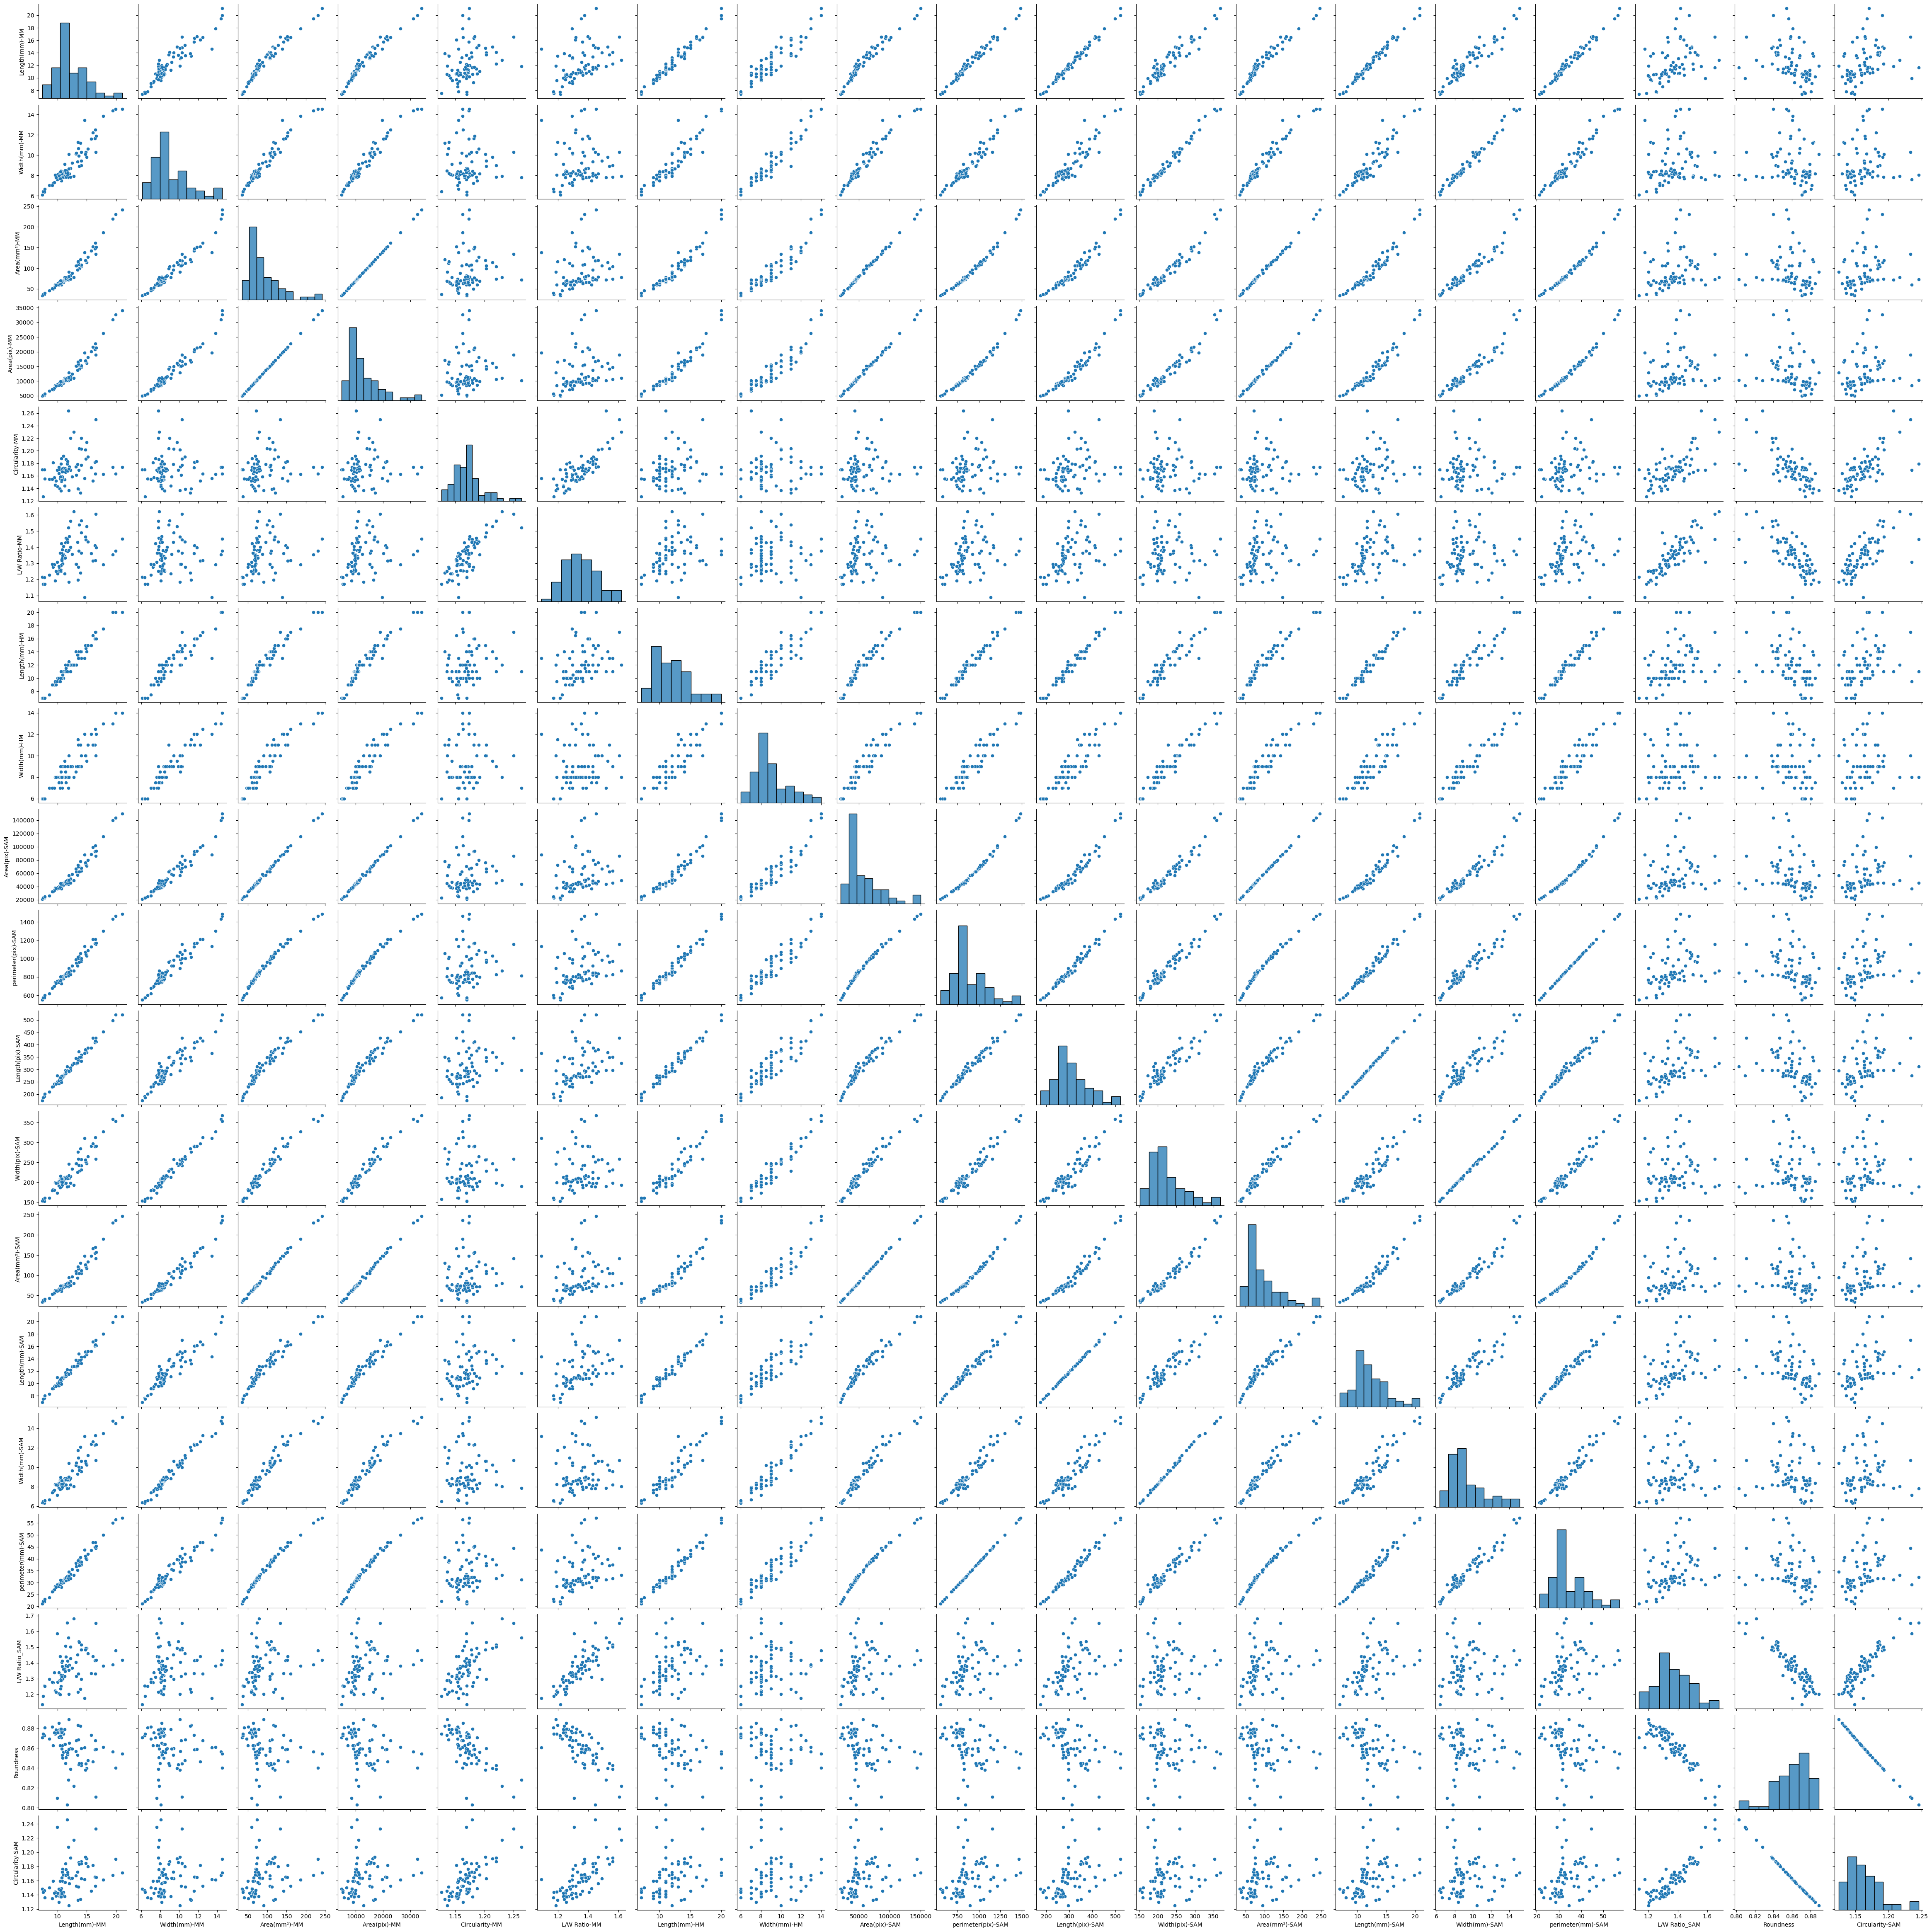

In [53]:
#Sns pairplots to visualise the relationship between different variables
sns.pairplot(df)

#### Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

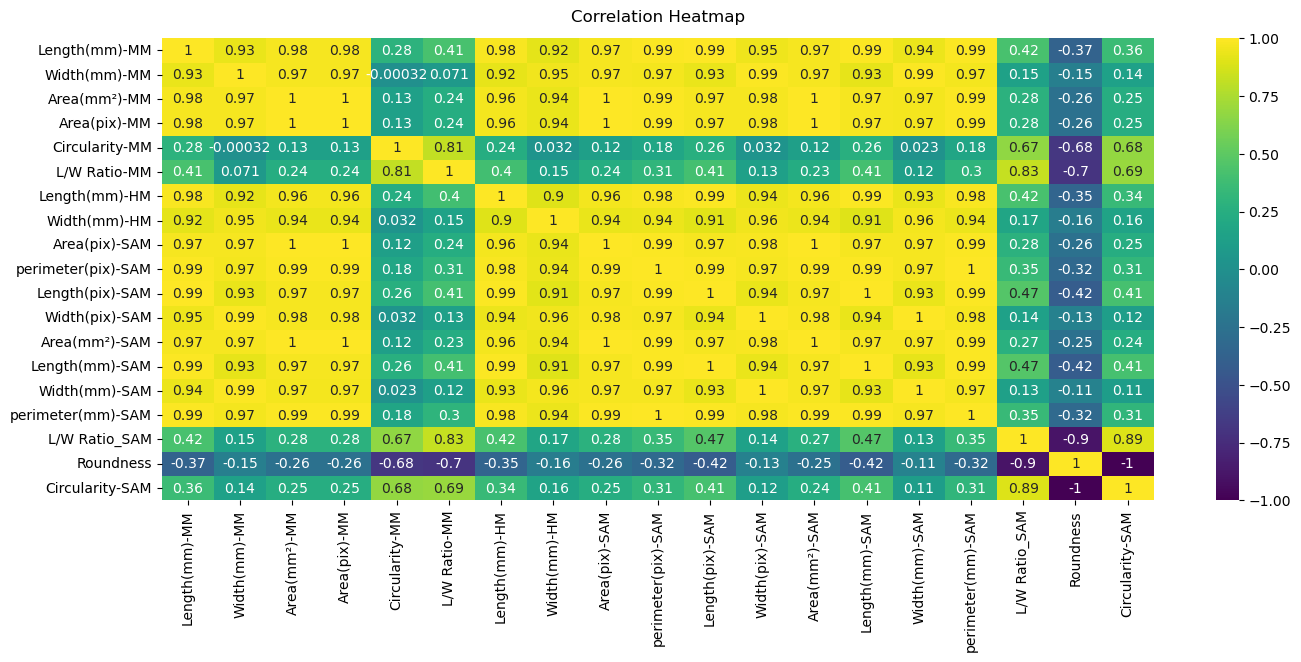

In [54]:
# Set the size of the heatmap.
plt.figure(figsize=(16, 6))

# Set the range of values to be displayed on the colormap from -1 to 1
#set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), cmap= 'viridis', vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

#### Results for Correlation stats:
#### Strong positive correlation coefficients (>0.9) between the parameters (Length, Width, Area, Circularity, L/W Ratio) of machine measured, SAM measured and (Length and Width) of hand measured shows a positive linear relationship between them.
#### Scatterplots for these parameters with points closely clustered around a line too suggest strong correlation between the respective columns for Length, Width, Area, Circularity, L/W Ratio.



    



### Analysis of individual parameters (length, Width, Area, Circularity, L/W ratio)

In [59]:
#Function to perform detailed statistical analysis (for selected columns), including descriptive statistics, normality tests, 
#checks for equal variances, comparison of means between pairs of columns, correlation to measure linear relationships, 
#comparison of means of multiple groups, and visualization techniques to each set of columns independently.

def analyze_columns(df, columns):
    print(f"\nAnalyzing columns: {columns}\n")
    
    # Descriptive statistics
    descriptive_stats = df[columns].describe()
    skewness = df[columns].skew()
    kurtosis_values = df[columns].kurtosis()
    
    
    print("Descriptive Statistics:\n", descriptive_stats)
    print("\nSkewness:\n", skewness)
    print("\nKurtosis:\n", kurtosis_values)
    
    # Create a histogram to visualize the distribution of the column 
    plt.figure(figsize=(4, 3))
    sns.histplot(df[columns], kde=True, color='blue', bins=30)
    plt.title(f"Distribution of {columns}")
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.show()
    
    # Normality test (Shapiro-Wilk)
    for col in columns:
        shapiro_test = shapiro(df[col])
        print(f"\nShapiro-Wilk Test for '{col}': {shapiro_test}")
    
    # Variance Homogeneity (Levene's Test)
    levene_test = levene(*[df[col] for col in columns])
    print(f"\nLevene's Test for equality of variances: {levene_test}")
    
    # Paired t-tests and Wilcoxon Signed-Rank Test for all column pairs
    for i in range(len(columns)):
        for j in range(i+1, len(columns)):
            col1, col2 = columns[i], columns[j]
            
            # Paired t-test
            ttest = ttest_rel(df[col1], df[col2])
            print(f"\nPaired t-test between '{col1}' and '{col2}': {ttest}")
            
            # Wilcoxon Signed-Rank Test
            wilcoxon_test = wilcoxon(df[col1], df[col2])
            print(f"Wilcoxon Signed-Rank Test between '{col1}' and '{col2}': {wilcoxon_test}")
            
            # Pearson and Spearman correlation
            pearson_corr = pearsonr(df[col1], df[col2])
            spearman_corr = spearmanr(df[col1], df[col2])
            print(f"Pearson correlation between '{col1}' and '{col2}': {pearson_corr}")
            print(f"Spearman correlation between '{col1}' and '{col2}': {spearman_corr}")

    # ANOVA
    anova_result = f_oneway(*[df[col] for col in columns])
    print(f"\nANOVA result across {columns}: {anova_result}")
    
    # Kruskal-Wallis Test
    kruskal_test = kruskal(*[df[col] for col in columns])
    print(f"Kruskal-Wallis Test across {columns}: {kruskal_test}")
    
    # Visualization
    #barplot
    ax = df[columns].plot(kind='bar', title = f"Comparison of {columns} of beans",
        figsize=(12,4), legend=True, fontsize=12)
    ax.set_xlabel("ID", fontsize=12)
    ax.set_ylabel(f'Units(mm', fontsize=12)
    plt.show()
    
    # Pairplot
    plt.figure(figsize=(2, 1))
    sns.pairplot(df[columns])
    plt.suptitle(f'Pairplot of {columns}', y=1.02)
    plt.show()
    
    # Boxplot
    plt.figure(figsize=(5, 4))
    sns.boxplot(data=df[columns])
    plt.title(f'Boxplot of {columns}')
    plt.show()
    
    # Violin plot
    plt.figure(figsize=(5, 4))
    sns.violinplot(data=df[columns])
    plt.title(f'Violin Plot of {columns}')
    plt.show()
    
    # Heatmap of Correlations
    correlation_matrix = df[columns].corr(method='pearson')
    plt.figure(figsize=(4, 3))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Heatmap of {columns}')
    plt.show()



#### Comparison of Length (mm) for Machine-measured, Hand-measured and SAM-measured


Analyzing columns: ['Length(mm)-MM', 'Length(mm)-HM', 'Length(mm)-SAM']

Descriptive Statistics:
        Length(mm)-MM  Length(mm)-HM  Length(mm)-SAM
count      74.000000      74.000000       74.000000
mean       12.292752      11.972973       12.251667
std         2.830953       2.935251        2.899493
min         7.403232       7.000000        6.912609
25%        10.589544      10.000000       10.639462
50%        11.534397      11.000000       11.554351
75%        13.843409      13.500000       13.764813
max        21.097440      20.000000       20.801577

Skewness:
 Length(mm)-MM     0.924422
Length(mm)-HM     0.838148
Length(mm)-SAM    0.967128
dtype: float64

Kurtosis:
 Length(mm)-MM     0.967234
Length(mm)-HM     0.777305
Length(mm)-SAM    1.118379
dtype: float64


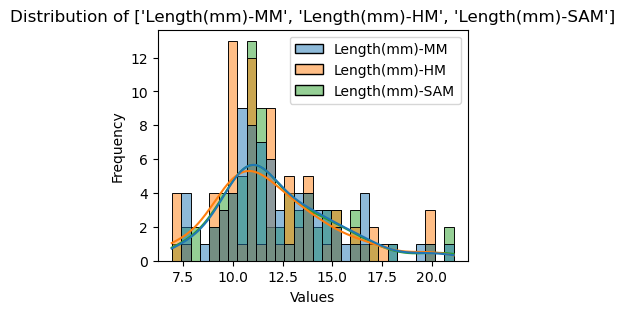


Shapiro-Wilk Test for 'Length(mm)-MM': ShapiroResult(statistic=0.9382516741752625, pvalue=0.0013004671782255173)

Shapiro-Wilk Test for 'Length(mm)-HM': ShapiroResult(statistic=0.9354286789894104, pvalue=0.0009390344494022429)

Shapiro-Wilk Test for 'Length(mm)-SAM': ShapiroResult(statistic=0.9322031736373901, pvalue=0.0006517646834254265)

Levene's Test for equality of variances: LeveneResult(statistic=0.03267187522117904, pvalue=0.9678608016606791)

Paired t-test between 'Length(mm)-MM' and 'Length(mm)-HM': TtestResult(statistic=5.282167488882579, pvalue=1.2674779932089298e-06, df=73)
Wilcoxon Signed-Rank Test between 'Length(mm)-MM' and 'Length(mm)-HM': WilcoxonResult(statistic=561.0, pvalue=8.485627769772483e-06)
Pearson correlation between 'Length(mm)-MM' and 'Length(mm)-HM': PearsonRResult(statistic=0.9843353727564108, pvalue=5.125069109508527e-56)
Spearman correlation between 'Length(mm)-MM' and 'Length(mm)-HM': SignificanceResult(statistic=0.974066474720939, pvalue=3.272661302

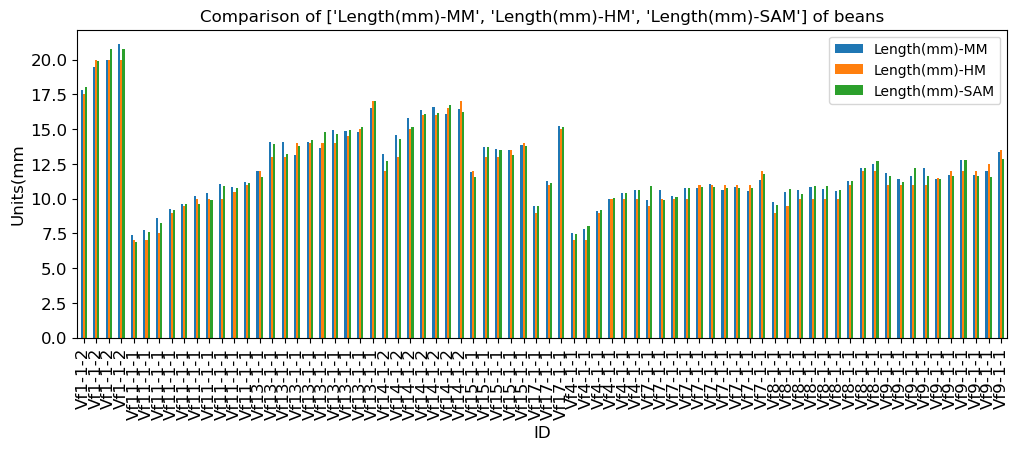

<Figure size 200x100 with 0 Axes>

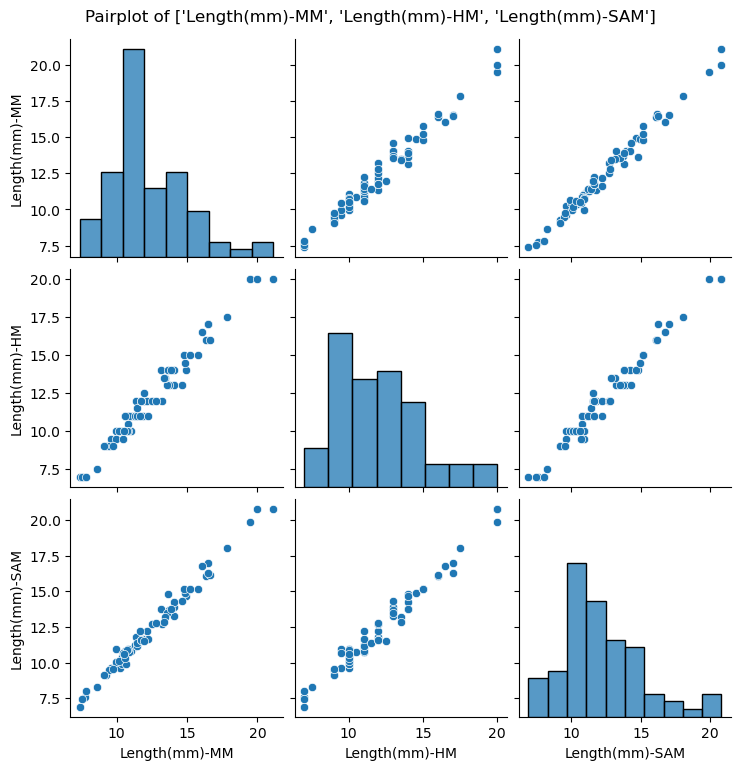

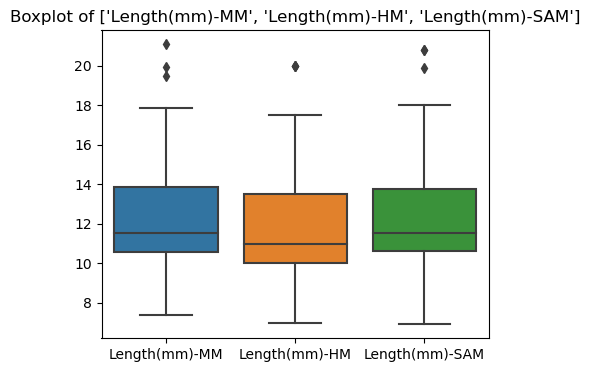

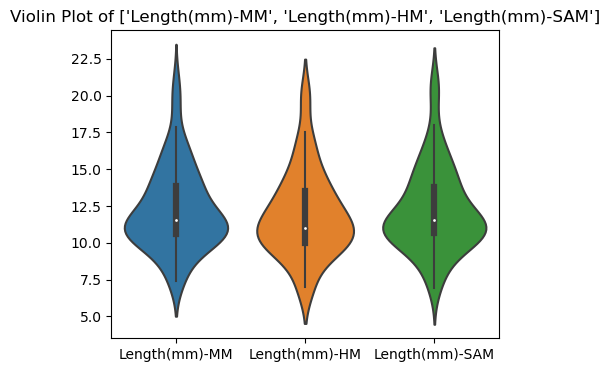

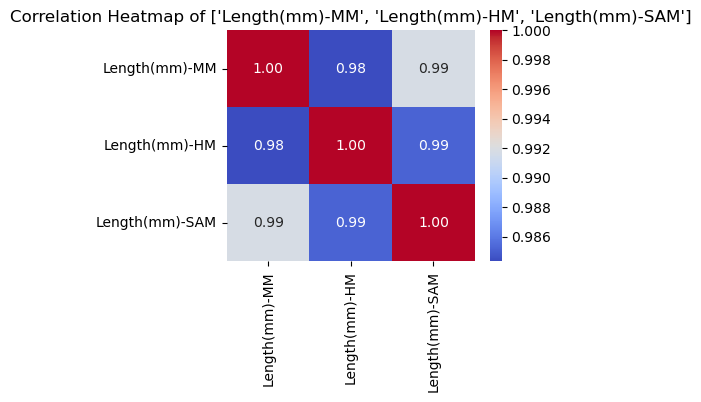

In [60]:
# Perform analysis on both sets of columns
analyze_columns(df, ['Length(mm)-MM', 'Length(mm)-HM', 'Length(mm)-SAM'])

#### Comparison of Width (mm) for Machine-measured, Hand-measured and SAM-measured


Analyzing columns: ['Width(mm)-MM', 'Width(mm)-HM', 'Width(mm)-SAM']

Descriptive Statistics:
        Width(mm)-MM  Width(mm)-HM  Width(mm)-SAM
count     74.000000     74.000000      74.000000
mean       9.114404      8.939189       9.384267
std        1.947646      1.859726       2.021894
min        6.092293      6.000000       6.323661
25%        7.915379      8.000000       8.131840
50%        8.367241      8.250000       8.697293
75%       10.125692     10.000000      10.413481
max       14.532204     14.000000      15.125732

Skewness:
 Width(mm)-MM     1.227589
Width(mm)-HM     0.912673
Width(mm)-SAM    1.053901
dtype: float64

Kurtosis:
 Width(mm)-MM     1.097097
Width(mm)-HM     0.440371
Width(mm)-SAM    0.651675
dtype: float64


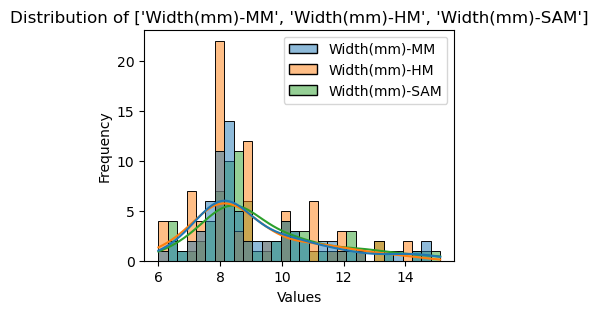


Shapiro-Wilk Test for 'Width(mm)-MM': ShapiroResult(statistic=0.8759496212005615, pvalue=2.904867187680793e-06)

Shapiro-Wilk Test for 'Width(mm)-HM': ShapiroResult(statistic=0.9113748073577881, pvalue=7.245741289807484e-05)

Shapiro-Wilk Test for 'Width(mm)-SAM': ShapiroResult(statistic=0.9031991362571716, pvalue=3.2742736948421225e-05)

Levene's Test for equality of variances: LeveneResult(statistic=0.06228935487733466, pvalue=0.9396276071064962)

Paired t-test between 'Width(mm)-MM' and 'Width(mm)-HM': TtestResult(statistic=2.565316678363512, pvalue=0.012361785217555502, df=73)
Wilcoxon Signed-Rank Test between 'Width(mm)-MM' and 'Width(mm)-HM': WilcoxonResult(statistic=854.0, pvalue=0.004051930113995925)
Pearson correlation between 'Width(mm)-MM' and 'Width(mm)-HM': PearsonRResult(statistic=0.9534130044858655, pvalue=3.296212252426343e-39)
Spearman correlation between 'Width(mm)-MM' and 'Width(mm)-HM': SignificanceResult(statistic=0.9292283272285707, pvalue=7.438262053606884e-33)


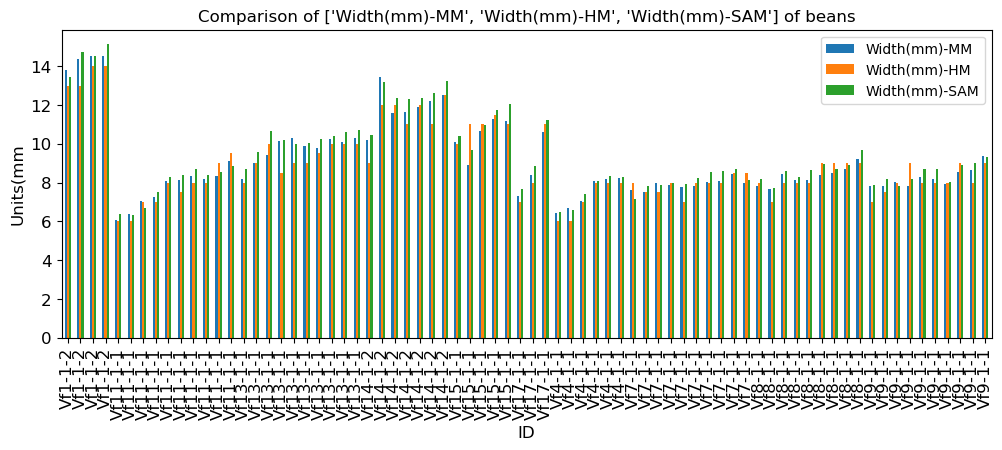

<Figure size 200x100 with 0 Axes>

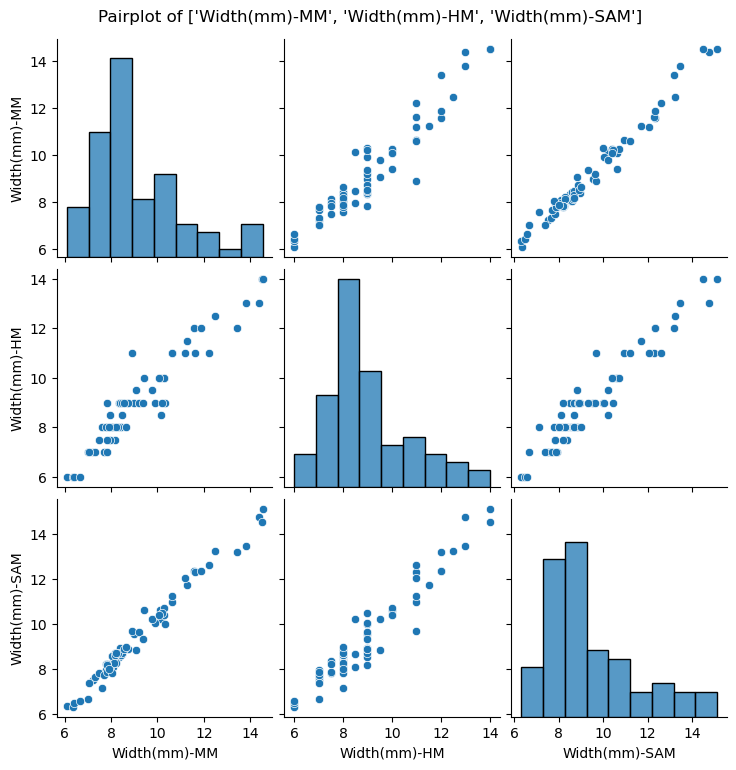

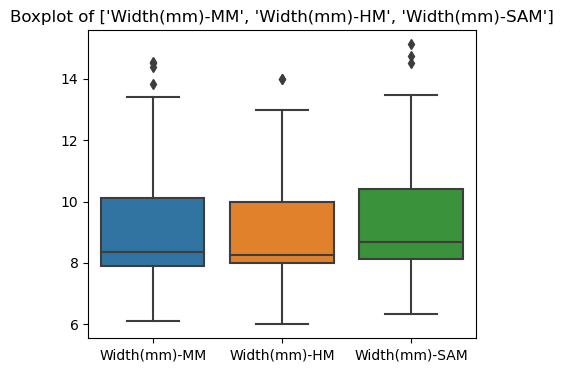

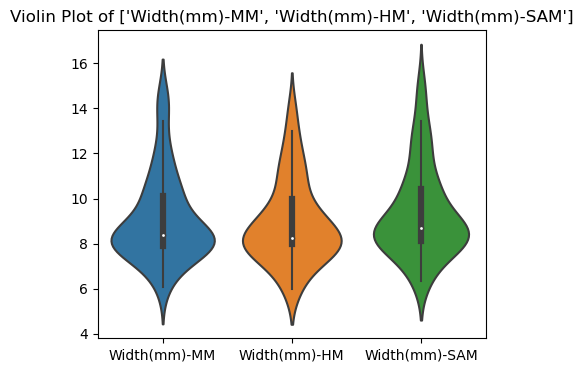

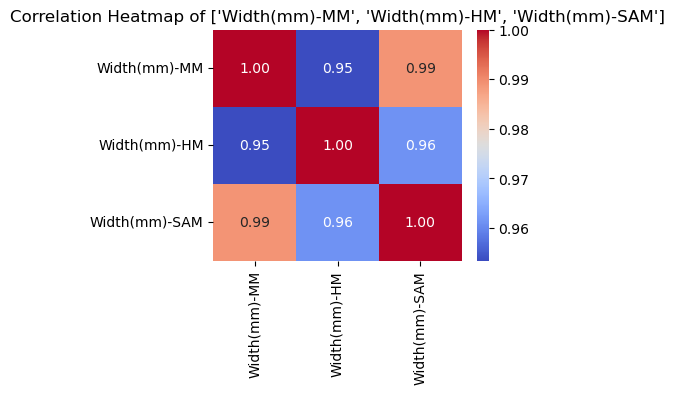

In [61]:
analyze_columns(df, ['Width(mm)-MM', 'Width(mm)-HM', 'Width(mm)-SAM'])

#### Comparison of Area(mm²) for Machine-measured and SAM-measured


Analyzing columns: ['Area(mm²)-MM', 'Area(mm²)-SAM']

Descriptive Statistics:
        Area(mm²)-MM  Area(mm²)-SAM
count     74.000000      74.000000
mean      90.931810      94.386640
std       42.935148      44.787110
min       34.125366      34.454229
25%       65.860169      67.770815
50%       74.511217      77.012616
75%      109.009996     115.202442
max      241.729082     246.725362

Skewness:
 Area(mm²)-MM     1.640070
Area(mm²)-SAM    1.577393
dtype: float64

Kurtosis:
 Area(mm²)-MM     2.968172
Area(mm²)-SAM    2.607153
dtype: float64


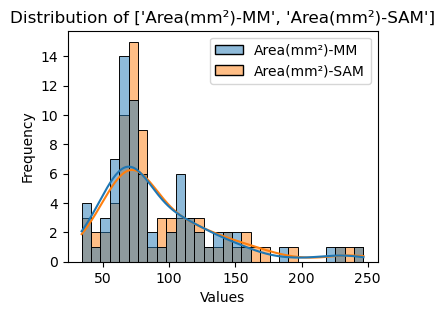


Shapiro-Wilk Test for 'Area(mm²)-MM': ShapiroResult(statistic=0.840949296951294, pvalue=1.9336521006607654e-07)

Shapiro-Wilk Test for 'Area(mm²)-SAM': ShapiroResult(statistic=0.8434628248214722, pvalue=2.3200568932679744e-07)

Levene's Test for equality of variances: LeveneResult(statistic=0.044554141501108986, pvalue=0.8331203351741985)

Paired t-test between 'Area(mm²)-MM' and 'Area(mm²)-SAM': TtestResult(statistic=-9.943158899616645, pvalue=3.247111831207396e-15, df=73)
Wilcoxon Signed-Rank Test between 'Area(mm²)-MM' and 'Area(mm²)-SAM': WilcoxonResult(statistic=87.0, pvalue=2.450522393097101e-12)
Pearson correlation between 'Area(mm²)-MM' and 'Area(mm²)-SAM': PearsonRResult(statistic=0.9985688478844349, pvalue=2.5289941763349902e-93)
Spearman correlation between 'Area(mm²)-MM' and 'Area(mm²)-SAM': SignificanceResult(statistic=0.9953498704183634, pvalue=6.35569762994198e-75)

ANOVA result across ['Area(mm²)-MM', 'Area(mm²)-SAM']: F_onewayResult(statistic=0.22945736149420964, pval

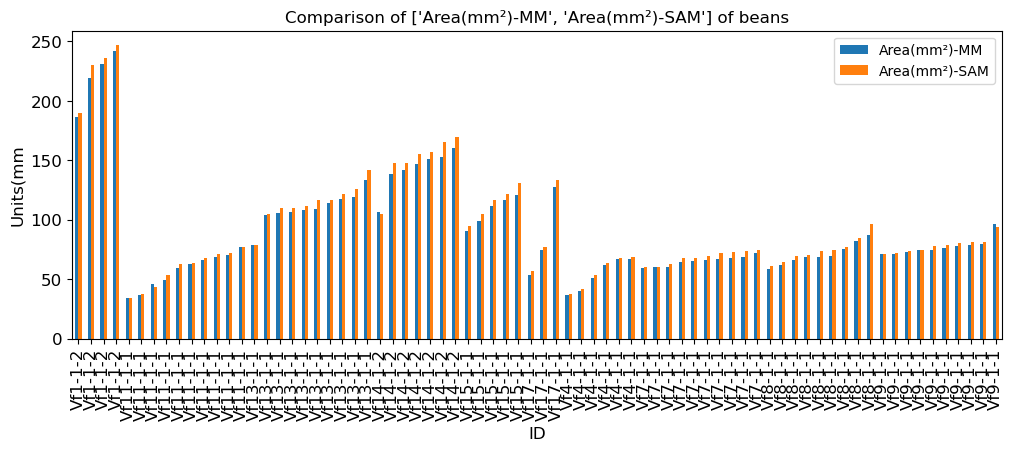

<Figure size 200x100 with 0 Axes>

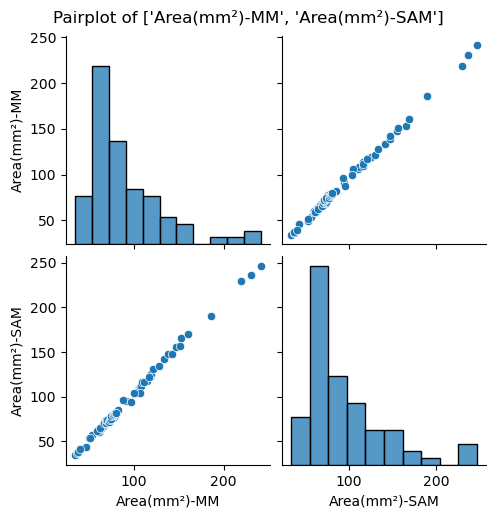

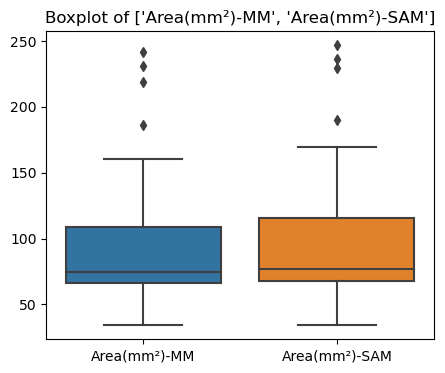

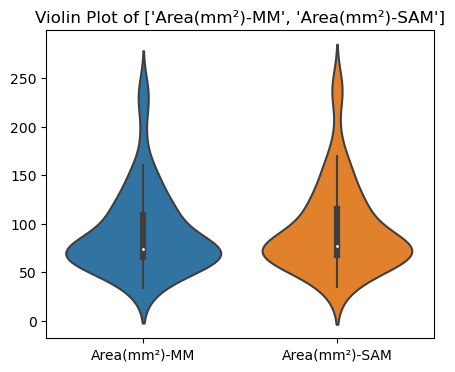

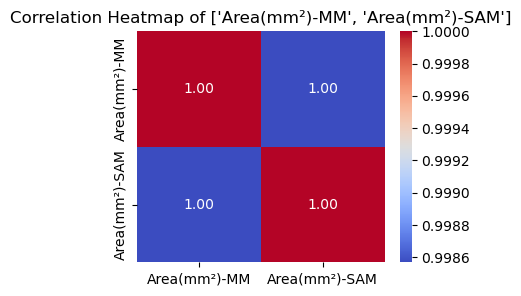

In [62]:
analyze_columns(df, ['Area(mm²)-MM', 'Area(mm²)-SAM'])

#### Comparison of L/W ratio for Machine-measured, Hand-measured and SAM-measured


Analyzing columns: ['L/W Ratio-MM', 'L/W Ratio_SAM']

Descriptive Statistics:
        L/W Ratio-MM  L/W Ratio_SAM
count     74.000000      74.000000
mean       1.347082       1.368760
std        0.109060       0.117607
min        1.088656       1.136833
25%        1.270896       1.289867
50%        1.345045       1.359772
75%        1.419505       1.440592
max        1.620578       1.681134

Skewness:
 L/W Ratio-MM     0.354723
L/W Ratio_SAM    0.488485
dtype: float64

Kurtosis:
 L/W Ratio-MM    -0.030312
L/W Ratio_SAM    0.057658
dtype: float64


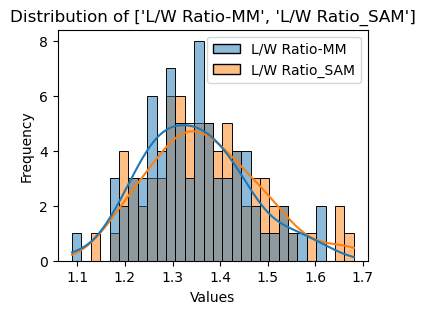


Shapiro-Wilk Test for 'L/W Ratio-MM': ShapiroResult(statistic=0.9855763912200928, pvalue=0.563947319984436)

Shapiro-Wilk Test for 'L/W Ratio_SAM': ShapiroResult(statistic=0.9787800312042236, pvalue=0.24785983562469482)

Levene's Test for equality of variances: LeveneResult(statistic=0.2885388489938006, pvalue=0.5919760918627675)

Paired t-test between 'L/W Ratio-MM' and 'L/W Ratio_SAM': TtestResult(statistic=-2.7635667933236228, pvalue=0.00723181018770455, df=73)
Wilcoxon Signed-Rank Test between 'L/W Ratio-MM' and 'L/W Ratio_SAM': WilcoxonResult(statistic=857.0, pvalue=0.004264162514472809)
Pearson correlation between 'L/W Ratio-MM' and 'L/W Ratio_SAM': PearsonRResult(statistic=0.8253546268887729, pvalue=1.5086057657027913e-19)
Spearman correlation between 'L/W Ratio-MM' and 'L/W Ratio_SAM': SignificanceResult(statistic=0.8353794890781191, pvalue=2.1623684019740032e-20)

ANOVA result across ['L/W Ratio-MM', 'L/W Ratio_SAM']: F_onewayResult(statistic=1.3517207275415635, pvalue=0.2468

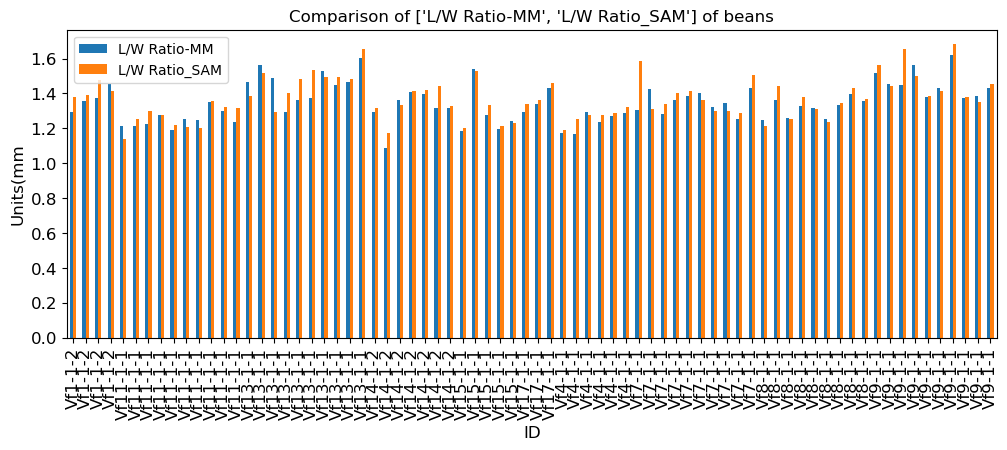

<Figure size 200x100 with 0 Axes>

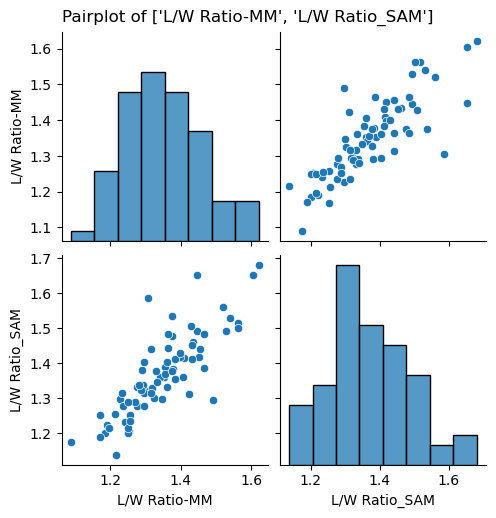

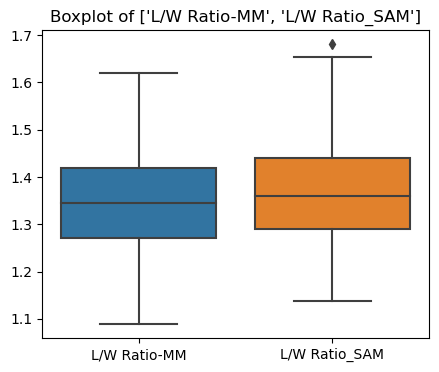

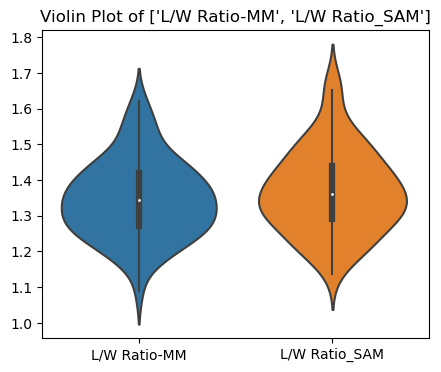

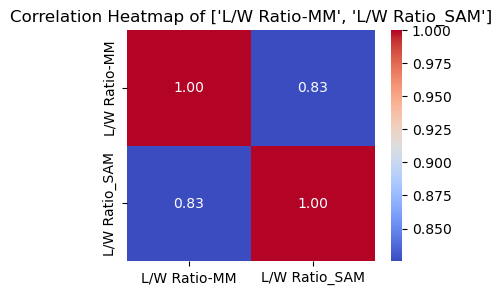

In [63]:
analyze_columns(df, ['L/W Ratio-MM', 'L/W Ratio_SAM'])

#### Comparison of Circularity for Machine-measured, Hand-measured and SAM-measured


Analyzing columns: ['Circularity-MM', 'Circularity-SAM']

Descriptive Statistics:
        Circularity-MM  Circularity-SAM
count       74.000000        74.000000
mean         1.170911         1.163167
std          0.025094         0.024810
min          1.126615         1.124841
25%          1.155515         1.143917
50%          1.169064         1.160484
75%          1.179251         1.175093
max          1.263545         1.245741

Skewness:
 Circularity-MM     1.318830
Circularity-SAM    1.207996
dtype: float64

Kurtosis:
 Circularity-MM     2.788694
Circularity-SAM    1.783407
dtype: float64


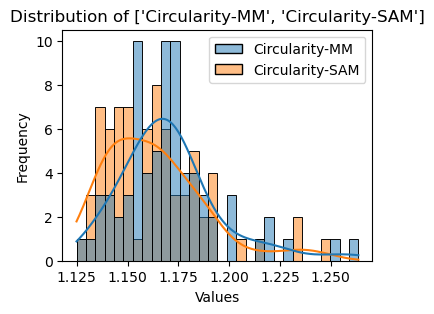


Shapiro-Wilk Test for 'Circularity-MM': ShapiroResult(statistic=0.9091337323188782, pvalue=5.807755223941058e-05)

Shapiro-Wilk Test for 'Circularity-SAM': ShapiroResult(statistic=0.9117269515991211, pvalue=7.503930828534067e-05)

Levene's Test for equality of variances: LeveneResult(statistic=0.1901277237975537, pvalue=0.6634543848510955)

Paired t-test between 'Circularity-MM' and 'Circularity-SAM': TtestResult(statistic=3.330470249911194, pvalue=0.0013621309552970108, df=73)
Wilcoxon Signed-Rank Test between 'Circularity-MM' and 'Circularity-SAM': WilcoxonResult(statistic=625.0, pvalue=3.995021433350754e-05)
Pearson correlation between 'Circularity-MM' and 'Circularity-SAM': PearsonRResult(statistic=0.6786789101892372, pvalue=3.0347412145899457e-11)
Spearman correlation between 'Circularity-MM' and 'Circularity-SAM': SignificanceResult(statistic=0.6789633469085523, pvalue=2.956327198118143e-11)

ANOVA result across ['Circularity-MM', 'Circularity-SAM']: F_onewayResult(statistic=3.5

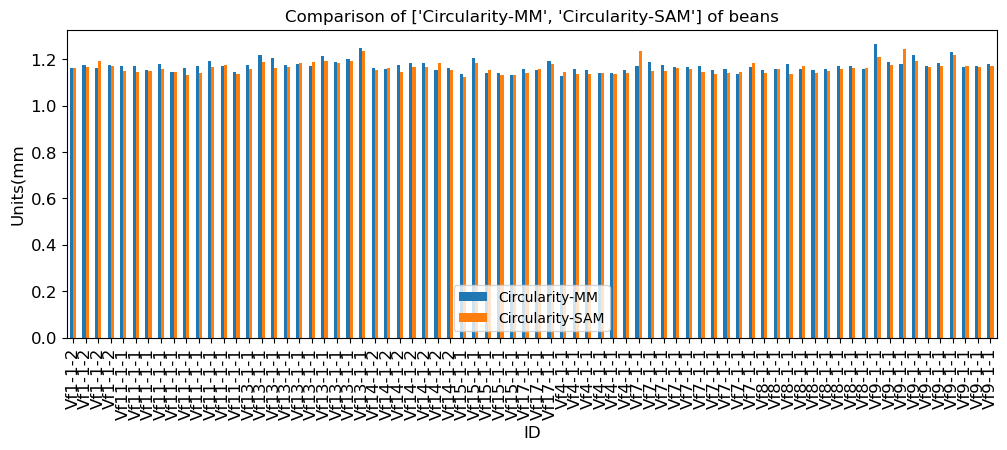

<Figure size 200x100 with 0 Axes>

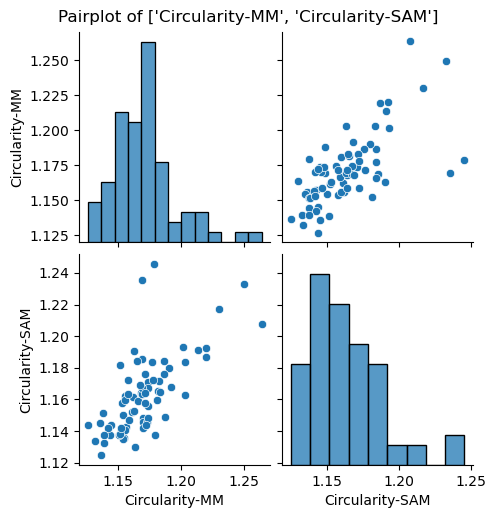

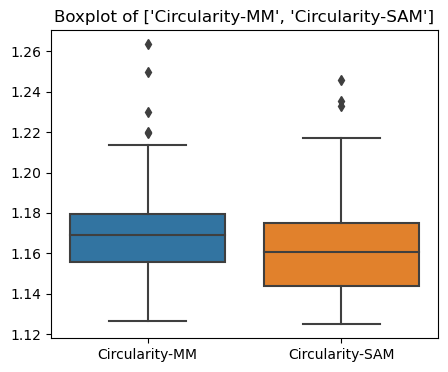

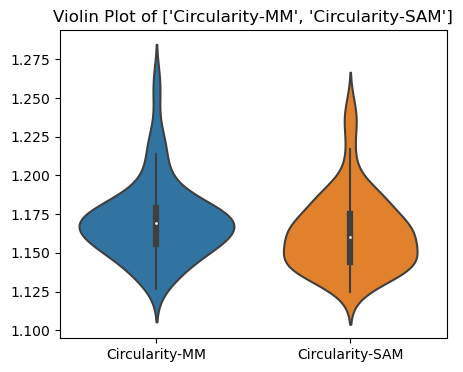

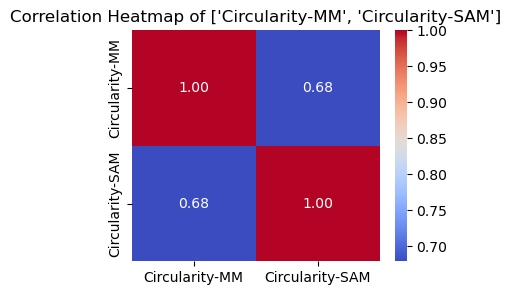

In [64]:
analyze_columns(df, ['Circularity-MM', 'Circularity-SAM'])


Analyzing columns: ['Area(pix)-MM', 'Area(pix)-SAM']

Descriptive Statistics:
        Area(pix)-MM  Area(pix)-SAM
count     74.000000      74.000000
mean   12905.418919   57133.472973
std     6047.914725   27049.368837
min     4889.000000   20920.000000
25%     9375.250000   41102.250000
50%    10594.500000   46519.000000
75%    15459.250000   69179.500000
max    34121.000000  150219.000000

Skewness:
 Area(pix)-MM     1.635885
Area(pix)-SAM    1.613991
dtype: float64

Kurtosis:
 Area(pix)-MM     2.952109
Area(pix)-SAM    2.815601
dtype: float64


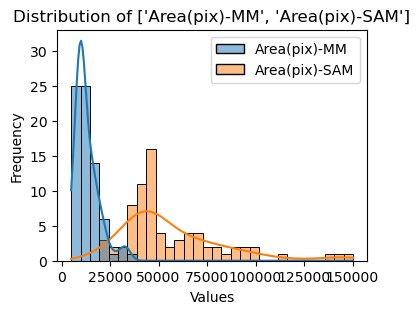


Shapiro-Wilk Test for 'Area(pix)-MM': ShapiroResult(statistic=0.8415271639823914, pvalue=2.0160578628747317e-07)

Shapiro-Wilk Test for 'Area(pix)-SAM': ShapiroResult(statistic=0.8418698906898499, pvalue=2.0666628586241131e-07)

Levene's Test for equality of variances: LeveneResult(statistic=28.39446511051448, pvalue=3.673392009653407e-07)

Paired t-test between 'Area(pix)-MM' and 'Area(pix)-SAM': TtestResult(statistic=-18.108290023096593, pvalue=1.026180618557591e-28, df=73)
Wilcoxon Signed-Rank Test between 'Area(pix)-MM' and 'Area(pix)-SAM': WilcoxonResult(statistic=0.0, pvalue=7.732733053009578e-14)
Pearson correlation between 'Area(pix)-MM' and 'Area(pix)-SAM': PearsonRResult(statistic=0.9988393232176721, pvalue=1.3485503392858133e-96)
Spearman correlation between 'Area(pix)-MM' and 'Area(pix)-SAM': SignificanceResult(statistic=0.996297667530544, pvalue=1.764244767199866e-78)

ANOVA result across ['Area(pix)-MM', 'Area(pix)-SAM']: F_onewayResult(statistic=188.42012444232432, pval

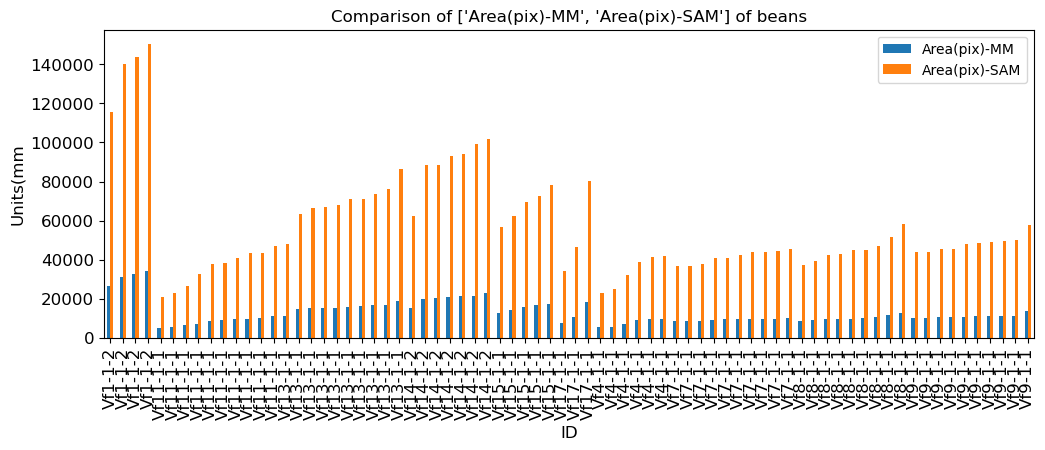

<Figure size 200x100 with 0 Axes>

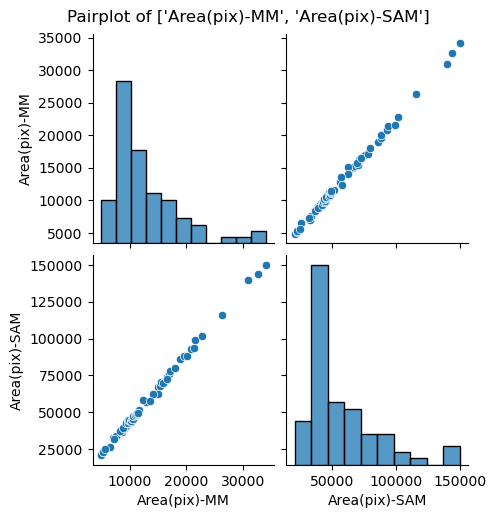

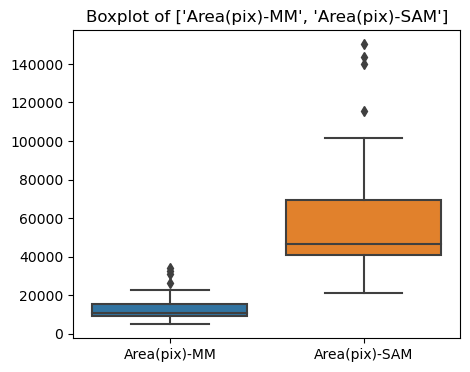

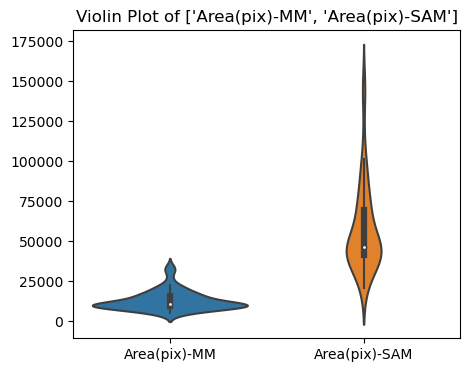

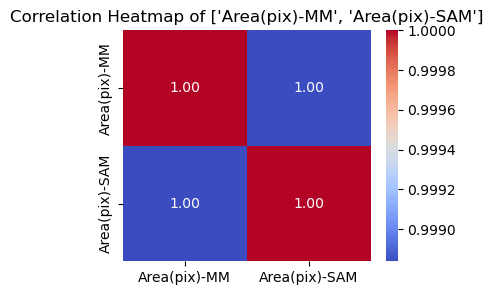

In [65]:
analyze_columns(df, ['Area(pix)-MM', 'Area(pix)-SAM'])

In [66]:
#### For finding the differences in units for lengths, widths and area 

In [67]:
#Difference in parameters by units
df['Len(SAM-MM)'] = df['Length(mm)-SAM'] - df['Length(mm)-MM']
df['Len(SAM-HM)'] = df['Length(mm)-SAM'] - df['Length(mm)-HM']
df['Wid(SAM-MM)'] = df['Width(mm)-SAM'] - df['Width(mm)-MM']
df['Wid(SAM-HM)'] = df['Width(mm)-SAM'] - df['Width(mm)-HM']
df['Area(SAM-MM)'] = df['Area(mm²)-SAM'] - df['Area(mm²)-MM']

print (df.head(2))

         Length(mm)-MM  Width(mm)-MM  Area(mm²)-MM  Area(pix)-MM  \
ID                                                                 
Vf1-1-2      17.850534     13.820892    186.338789       26346.0   
Vf1-1-2      19.485046     14.386841    219.192047       30962.0   

         Circularity-MM  L/W Ratio-MM  Length(mm)-HM  Width(mm)-HM  \
ID                                                                   
Vf1-1-2        1.162423      1.291562           17.5          13.0   
Vf1-1-2        1.173565      1.354366           20.0          13.0   

         Area(pix)-SAM  perimeter(pix)-SAM  ...  Width(mm)-SAM  \
ID                                          ...                  
Vf1-1-2       115822.0         1299.834703  ...      13.457132   
Vf1-1-2       139933.0         1432.579869  ...      14.750260   

         perimeter(mm)-SAM  L/W Ratio_SAM  Roundness  Circularity-SAM  \
ID                                                                      
Vf1-1-2          49.988007       1.

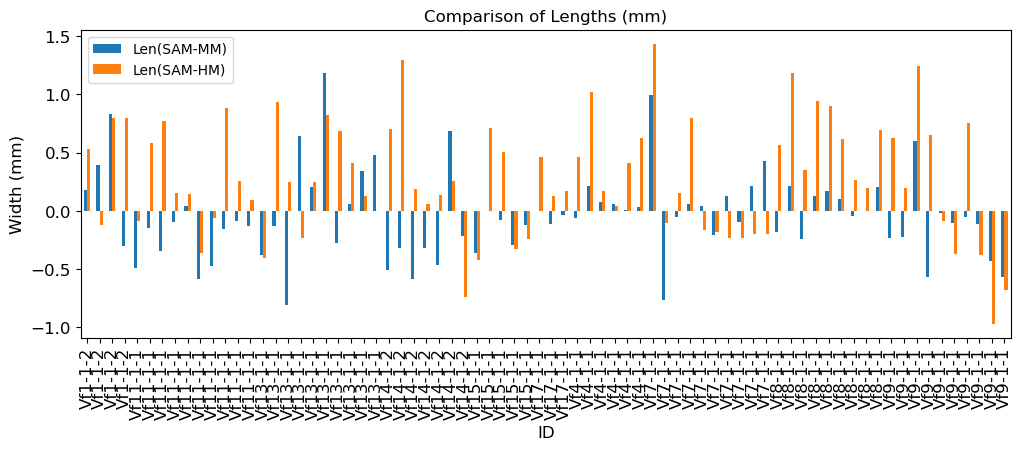

In [68]:
ax = df[['Len(SAM-MM)','Len(SAM-HM)']].plot(kind='bar', title ="Comparison of Lengths (mm)",
                                    figsize=(12,4), legend=True, fontsize=12)
ax.set_xlabel("ID", fontsize=12)
ax.set_ylabel("Width (mm)", fontsize=12)
plt.show()

Comparison studies:


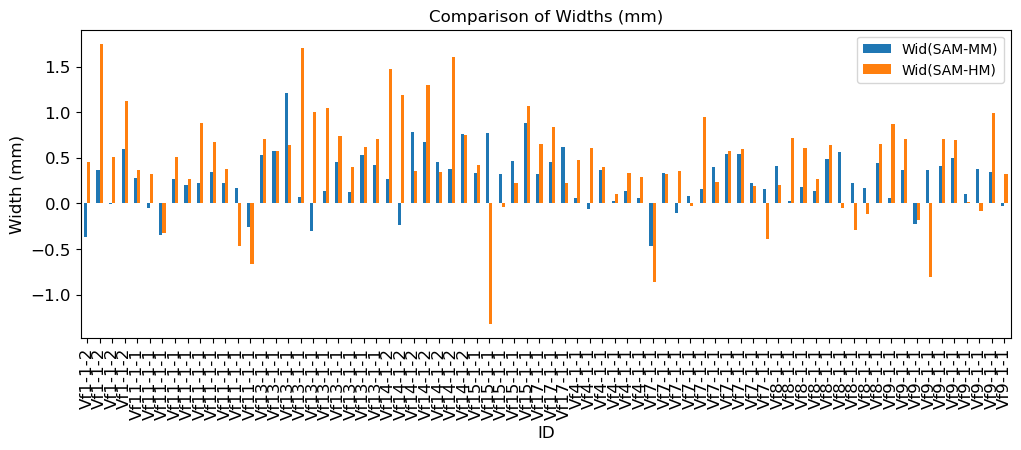

In [69]:
ax = df[['Wid(SAM-MM)','Wid(SAM-HM)']].plot(kind='bar', title ="Comparison of Widths (mm)",
                                                                        figsize=(12,4), legend=True, fontsize=12)
ax.set_xlabel("ID", fontsize=12)
ax.set_ylabel("Width (mm)", fontsize=12)
plt.show()

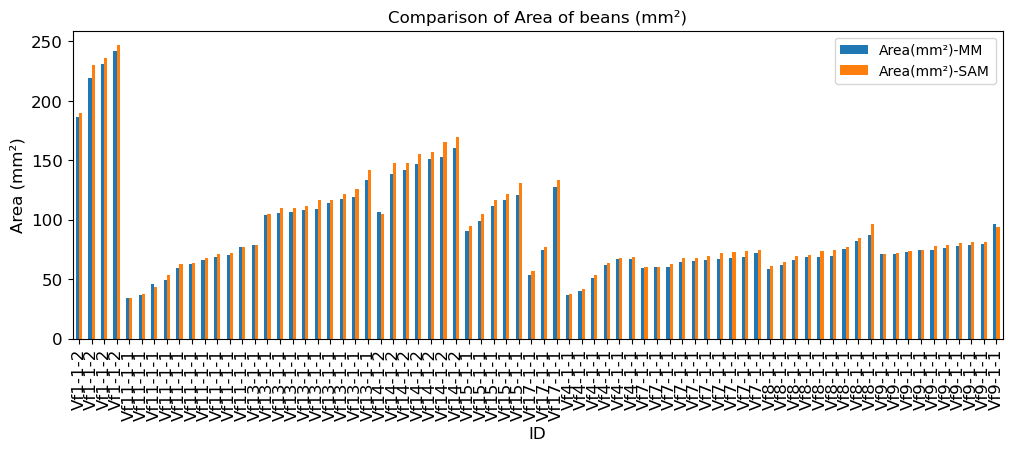

In [70]:
ax = df[['Area(mm²)-MM','Area(mm²)-SAM']].plot(kind='bar', title ="Comparison of Area of beans (mm²)",
                                                                        figsize=(12,4), legend=True, fontsize=12)
ax.set_xlabel("ID", fontsize=12)
ax.set_ylabel("Area (mm²)", fontsize=12)
plt.show()

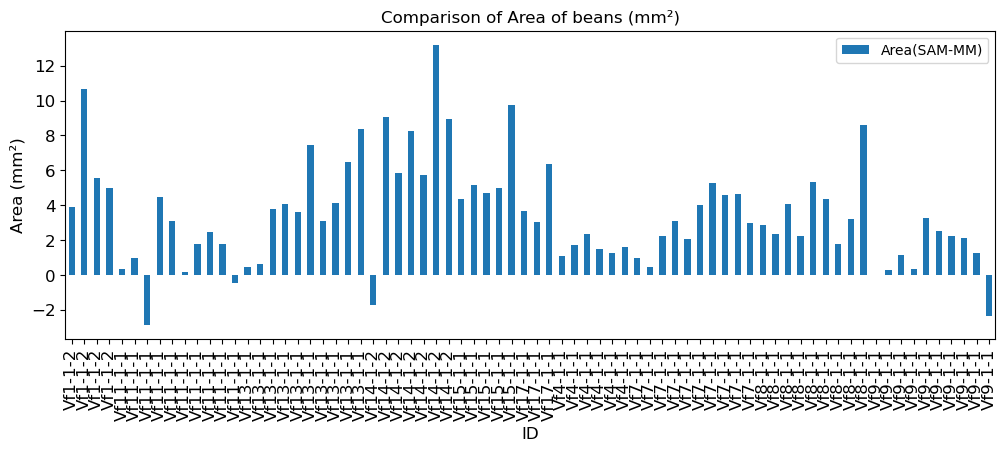

In [71]:

ax = df[['Area(SAM-MM)']].plot(kind='bar', title ="Comparison of Area of beans (mm²)",
                                                                        figsize=(12,4), legend=True, fontsize=12)
ax.set_xlabel("ID", fontsize=12)
ax.set_ylabel("Area (mm²)", fontsize=12)
plt.show()

### Statistical analysis for each image

          Length(mm)-SAM
ID                      
Vf1-1-2        19.878046
Vf14-1-2       15.341827
Vf13-1-1       14.334770
Vf15-1-1       13.145967
Vf17-1-1       11.921493
Vf9-1-1        11.848711
Vf8-1-1        11.023362
Vf7-1-1        10.756954
Vf11-1-1        9.388208
Vf4-1-1         9.287901
          Width(mm)-SAM
ID                     
Vf1-1-2       14.461434
Vf14-1-2      12.358265
Vf15-1-1      10.968266
Vf13-1-1      10.113216
Vf17-1-1       9.234426
Vf8-1-1        8.624083
Vf9-1-1        8.471030
Vf7-1-1        8.094539
Vf11-1-1       7.793569
Vf4-1-1        7.532874
          Area(mm²)-SAM
ID                     
Vf1-1-2      225.770320
Vf14-1-2     149.651363
Vf13-1-1     113.902856
Vf15-1-1     113.585678
Vf17-1-1      89.418998
Vf9-1-1       78.583476
Vf8-1-1       74.823502
Vf7-1-1       68.270657
Vf11-1-1      58.322018
Vf4-1-1       55.597262


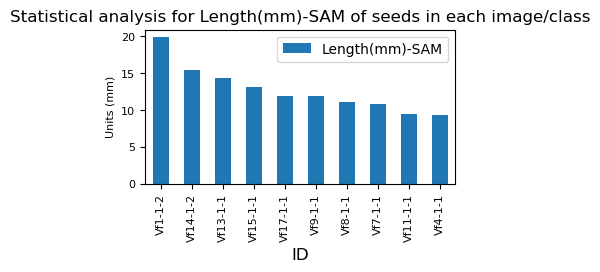

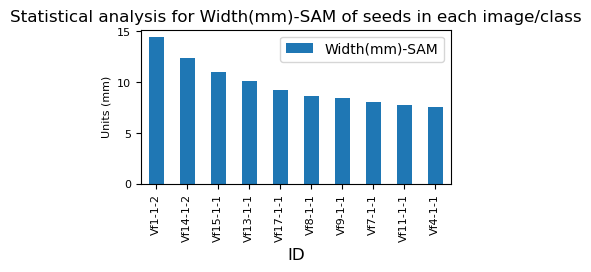

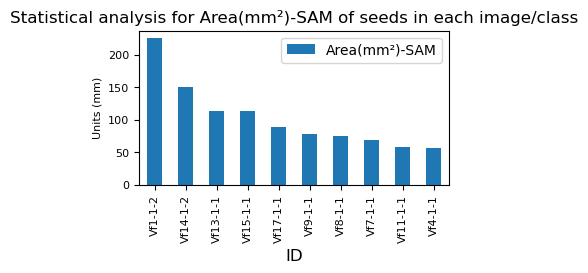

In [72]:
parameters=['Length(mm)-SAM', 'Width(mm)-SAM', 'Area(mm²)-SAM']
for column in parameters:
    stats_summary = df.groupby('ID').agg({column:'mean'}).sort_values(by=(column),ascending=False)
    print (stats_summary)
#statistical analysis for each image
    ax = stats_summary.plot(kind='bar', title = f"Statistical analysis for {column} of seeds in each image/class",
    figsize=(4,2), legend=True, fontsize=8)
    ax.set_xlabel("ID", fontsize=12)
    ax.set_ylabel("Units (mm)", fontsize=8)
    plt.legend(loc="best")
plt.show()

#### Check the number of seeds in each image


In [73]:
dfs=['GT', 'HM', 'FE_SAM', 'df']
for i in dfs:
    print (i)
    print (f"Number of seeds in each image for dataframe {i} are: ")
    print (df.index.value_counts())           


GT
Number of seeds in each image for dataframe GT are: 
ID
Vf11-1-1    10
Vf13-1-1    10
Vf7-1-1     10
Vf9-1-1     10
Vf8-1-1      9
Vf14-1-2     7
Vf4-1-1      6
Vf15-1-1     5
Vf1-1-2      4
Vf17-1-1     3
Name: count, dtype: int64
HM
Number of seeds in each image for dataframe HM are: 
ID
Vf11-1-1    10
Vf13-1-1    10
Vf7-1-1     10
Vf9-1-1     10
Vf8-1-1      9
Vf14-1-2     7
Vf4-1-1      6
Vf15-1-1     5
Vf1-1-2      4
Vf17-1-1     3
Name: count, dtype: int64
FE_SAM
Number of seeds in each image for dataframe FE_SAM are: 
ID
Vf11-1-1    10
Vf13-1-1    10
Vf7-1-1     10
Vf9-1-1     10
Vf8-1-1      9
Vf14-1-2     7
Vf4-1-1      6
Vf15-1-1     5
Vf1-1-2      4
Vf17-1-1     3
Name: count, dtype: int64
df
Number of seeds in each image for dataframe df are: 
ID
Vf11-1-1    10
Vf13-1-1    10
Vf7-1-1     10
Vf9-1-1     10
Vf8-1-1      9
Vf14-1-2     7
Vf4-1-1      6
Vf15-1-1     5
Vf1-1-2      4
Vf17-1-1     3
Name: count, dtype: int64


#### Check the equality of number of seeds in all dfs

In [74]:
GT.index.value_counts()==HM.index.value_counts()

ID
Vf11-1-1    True
Vf13-1-1    True
Vf7-1-1     True
Vf9-1-1     True
Vf8-1-1     True
Vf14-1-2    True
Vf16-1-1    True
Vf4-1-1     True
Vf15-1-1    True
Vf1-1-2     True
Vf17-1-1    True
Name: count, dtype: bool

In [75]:
GT.index.value_counts()==FE_SAM.index.value_counts()

ID
Vf11-1-1    True
Vf13-1-1    True
Vf7-1-1     True
Vf9-1-1     True
Vf8-1-1     True
Vf14-1-2    True
Vf16-1-1    True
Vf4-1-1     True
Vf15-1-1    True
Vf1-1-2     True
Vf17-1-1    True
Name: count, dtype: bool

Details of the result analysis are in the summary report.

Conclusion: 
The statistical analysis conducted on the dataset of ground-truth and SAM-measured data yields several important insights. The Shapiro-Wilk tests indicate that the data for all groups are not normally distributed, highlighting the need for caution when interpreting the results of parametric tests. Levene’s test confirms that the variances across the groups are equal, allowing for the valid application of tests assuming equal variances. The paired t-test results show that the p-value is much less than 0.05 for most of the columns, indicating a significant difference between their means. In general, for data of beans by machine-measured and SAM-measured, there is no significant difference between their means.  The correlation analysis shows strong positive relationships between the groups, indicating that they move together in a linear and rank-order manner. Despite individual pairwise differences, the ANOVA and Kruskal-Wallis tests suggest that there is no significant difference in the overall variance across the groups. 